In [283]:
# coding=utf-8
import pandas as pd
import numpy as np
from sklearn import preprocessing

df=pd.read_csv(r'/Users/ranmo/Desktop/天池/幸福感/happiness_train_complete.csv',encoding='GB2312',index_col='id')
df = df.sample(frac=1,replace=False,random_state=11)    #shuffle
df = df[df["happiness"]>0]   #原表中幸福度非正的都是错误数据,可以剔除12条错误数据

df.dtypes[df.dtypes==object]  #查得有四列不是数据类型，需要对其进行转化
for i in range(df.dtypes[df.dtypes==object].shape[0]):
    print(df.dtypes[df.dtypes==object].index[i])
    
    
#转化四列数据，转换后df全为数值格式
df["survey_month"] = df["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[1]).astype("int64")   #返回调查月：用空格来切分日期和时间，日期中第1项为月
df["survey_day"] = df["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[2]).astype("int64")   #返回调查日
df["survey_hour"] = df["survey_time"].transform(lambda line:line.split(" ")[1].split(":")[0]).astype("int64")   #返回调查小时
df=df.drop(columns='survey_time')

enc1=preprocessing.OrdinalEncoder()
enc2=preprocessing.OrdinalEncoder()
enc3=preprocessing.OrdinalEncoder()
df['edu_other']=enc1.fit_transform(df['edu_other'].fillna(0).transform(lambda x:str(x)).values.reshape(-1,1))
print(enc1.categories_)  #查看编码类型

df['property_other']=enc2.fit_transform(df['property_other'].fillna(0).transform(lambda x:str(x)).values.reshape(-1,1))
print(enc2.categories_)  #查看编码类型

df['invest_other']=enc3.fit_transform(df['invest_other'].fillna(0).transform(lambda x:str(x)).values.reshape(-1,1))
print(enc3.categories_)  #查看编码类型


#确定X和Y
X=df.drop(columns='happiness').fillna(0)
Y=df.happiness

survey_time
edu_other
property_other
invest_other
[array(['0', '夜校'], dtype=object)]
[array(['0', '两人共有', '两兄弟共有', '但目前房产证还没办下来', '兄弟三人共同所有', '兄弟共有', '全家人共同所有',
       '全家人共有', '全家共有', '全家所有', '共同所有', '共有', '农村没有产权，最近才开始办理',
       '原为配偶所有，配偶刚去世，还未办理转移手续', '受访者称该房全家人共有', '合建房', '多人共有', '多人拥有',
       '家人共有', '家人所有', '家庭共同所有', '家庭成员共有', '家庭成员所有', '小产权', '小产权房',
       '尚未办理房产证', '已购买，但未过户', '已购买，未过户', '待办', '户主所有', '房产证未办好',
       '才买，还无房产证', '拆迁分配，还没房产证', '无产权', '无房产证', '暂时没有房产证，已经开始办理了。',
       '未分家，全家所有', '未办', '未办理房产证', '未过户', '没办理房产证，未验收合格',
       '没时间和金钱过户，但是东西都在本人手里拿着', '没有产权', '没有产权，还没办理完手续', '没有房产证', '没有房产证。',
       '没有房照', '父亲共同所有', '祖宗', '自己房子被烧毁', '访户说是虹园新村大队分的房子', '还未过户',
       '还没办下房产证'], dtype=object)]
[array(['0', '个人融资', '储蓄存款', '其他理财产品', '商业万能保险', '字画、茶壶', '家中有部分土地承包出去',
       '彩票', '投资开发区', '投资服务业、家具业', '民间借贷', '没有', '活期储蓄', '理财', '理财产品',
       '福利车票', '租房', '统筹', '网上理财', '老人家不清楚', '自己没有，儿女不清楚', '银行存款',
       '银行存款利息', '银行理财', '高利贷'], dtype=object)]


In [5]:
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
#=============
#1、线性回归
#=============

#=============
#1.1、普通线性回归
#=============
reg11=linear_model.LinearRegression()
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
#mes1是未取整，mes2是四舍五入取整,mes3是向下取整，mes4是向上取整
mes1=[]
mes2=[]
mes3=[]
mes4=[]
kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=reg1.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    e2=metrics.mean_squared_error(np.round(y_pred),y_test)
    e3=metrics.mean_squared_error(np.trunc(y_pred),y_test)
    e4=metrics.mean_squared_error(np.ceil(y_pred),y_test)
    mes1.append(e1)
    mes2.append(e2)
    mes3.append(e3)
    mes4.append(e4)
print('normal_liner:')
print(mes1)
print(np.mean(mes1))
print('-------------')
print(mes2)
print(np.mean(mes2))
print('-------------')
print(mes3)
print(np.mean(mes3))
print('-------------')
print(mes4)
print(np.mean(mes4))
print()
print()
#表明几种取整的方案都不是很好，不如回归的效果，但是回归的非整数也不满足目标值需求，因此要考虑分类


#=============
#1.2、L1的lasso回归
#=============
reg12=linear_model.Lasso()
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
#mes1是未取整，mes2是四舍五入取整,mes3是向下取整，mes4是向上取整
mes1=[]
mes2=[]
mes3=[]
mes4=[]
kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=reg2.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    e2=metrics.mean_squared_error(np.round(y_pred),y_test)
    e3=metrics.mean_squared_error(np.trunc(y_pred),y_test)
    e4=metrics.mean_squared_error(np.ceil(y_pred),y_test)
    mes1.append(e1)
    mes2.append(e2)
    mes3.append(e3)
    mes4.append(e4)
print('Lasso:')
print(mes1)
print(np.mean(mes1))
print('-------------')
print(mes2)
print(np.mean(mes2))
print('-------------')
print(mes3)
print(np.mean(mes3))
print('-------------')
print(mes4)
print(np.mean(mes4))
print()
print()

#=============
#1.3、L2的岭回归
#=============
reg13=linear_model.Ridge()
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
#mes1是未取整，mes2是四舍五入取整,mes3是向下取整，mes4是向上取整
mes1=[]
mes2=[]
mes3=[]
mes4=[]
kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=reg3.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    e2=metrics.mean_squared_error(np.round(y_pred),y_test)
    e3=metrics.mean_squared_error(np.trunc(y_pred),y_test)
    e4=metrics.mean_squared_error(np.ceil(y_pred),y_test)
    mes1.append(e1)
    mes2.append(e2)
    mes3.append(e3)
    mes4.append(e4)
print('Ridge:')
print(mes1)
print(np.mean(mes1))
print('-------------')
print(mes2)
print(np.mean(mes2))
print('-------------')
print(mes3)
print(np.mean(mes3))
print('-------------')
print(mes4)
print(np.mean(mes4))
print()
print()

#=============
#1.4、逻辑回归
#=============
clf14=linear_model.LogisticRegression(penalty='none',solver='saga') #正则会导致准确率下降，所以不正则
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes1=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=reg3.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes1.append(e1)
print('LR:')
print(mes1)
print(np.mean(mes1))
print()
print()


#结论：普通二乘回归和逻辑回归效果最好

normal_liner:
[0.5234834606771416, 0.5345769352485128, 0.5626651727785572, 0.48371040188880665, 0.5166569033171943, 0.5052880156786113, 0.5211523229753292, 0.494012800228065, 0.5028936957396114, 0.5096770937305932]
0.5154116802262422
-------------
[0.60450563204005, 0.6120150187734669, 0.6207759699624531, 0.5569461827284106, 0.5682102628285357, 0.5682102628285357, 0.5882352941176471, 0.5682102628285357, 0.5526315789473685, 0.5852130325814536]
0.5824953497636456
-------------
[0.8523153942428036, 0.8648310387984981, 0.8986232790988736, 0.8322903629536921, 0.8886107634543179, 0.8785982478097623, 0.8785982478097623, 0.8760951188986232, 0.9110275689223057, 0.8796992481203008]
0.8760689270108939
-------------
[0.918648310387985, 0.9261576971214017, 0.9724655819774718, 0.8135168961201502, 0.8973717146433041, 0.8523153942428036, 0.8122653316645807, 0.8397997496871089, 0.8508771929824561, 0.8170426065162907]
0.8700460475343552


Lasso:
[0.6170772471573439, 0.6779203926540882, 0.629789061394211

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.41673e-17): result may not be accurate.
  overwrite_a=True).T
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.9913e-17): result may not be accurate.
  overwrite_a=True).T
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.55617e-17): result may not be accurate.
  overwrite_a=True).T
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.647e-17): result may not be accurate.
  overwrite_a=True).T
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.65761e-17): result may not be accurate.
  overwrite_a=True).T
/Users/ranmo/anaconda3/lib/p

LR:
[0.5225546989258565, 0.46103025615305576, 0.4962177507990545, 0.5046592212394725, 0.5480498547160676, 0.5163404965479477, 0.5169683054578822, 0.49628428281460835, 0.4970170036852353, 0.5645896528208554]
0.5123711523160036




/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.84451e-17): result may not be accurate.
  overwrite_a=True).T
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.64586e-17): result may not be accurate.
  overwrite_a=True).T
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.60655e-17): result may not be accurate.
  overwrite_a=True).T
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.43102e-17): result may not be accurate.
  overwrite_a=True).T


In [3]:
from sklearn import metrics
from sklearn import svm
from sklearn import model_selection
#=============
#2、SVM
#=============
clf2=svm.SVC()   #gamma和C都是默认值，没有调参
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf2.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('SVM:')
print(mes)
print(np.mean(mes))
print()
print()


#结论：效果很一般

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/skle

SVM:
[0.6871088861076345, 0.6370463078848561, 0.685857321652065, 0.5932415519399249, 0.7847309136420526, 0.7296620775969962, 0.6971214017521903, 0.6370463078848561, 0.6979949874686717, 0.7268170426065163]
0.6876626798535763




In [37]:
from sklearn import metrics
from sklearn import neighbors
from sklearn import model_selection
#=============
#3、KNN
#=============

for n in range(10,101,10):    #K值肯定会造成影响
    clf3=neighbors.KNeighborsClassifier(n_neighbors=n)  
    #交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
    mes=[]

    kf=model_selection.KFold(10,shuffle=True)
    for train,test in kf.split(X):
        X_train = X.iloc[train]
        y_train = Y.iloc[train]
        X_test = X.iloc[test]
        y_test = Y.iloc[test]

        y_pred=clf3.fit(X_train,y_train).predict(X_test)
        e1=metrics.mean_squared_error(y_pred,y_test)
        mes.append(e1)
    print('KNN(n=%d):'%n)
    print(mes)
    print(np.mean(mes))
    print()
    print()
    
#结论：效果很一般

KNN(n=10):
[0.7446808510638298, 0.8147684605757196, 0.7822277847309136, 0.7709637046307884, 0.8660826032540676, 0.8573216520650814, 0.7146433041301627, 0.8222778473091364, 0.7581453634085213, 0.8208020050125313]
0.7951913576180752


KNN(n=20):
[0.704630788485607, 0.785982478097622, 0.6783479349186483, 0.590738423028786, 0.7709637046307884, 0.737171464330413, 0.72090112640801, 0.6495619524405507, 0.7418546365914787, 0.7518796992481203]
0.7132032208180024


KNN(n=30):
[0.6958698372966208, 0.6145181476846058, 0.6758448060075094, 0.7246558197747184, 0.718397997496871, 0.718397997496871, 0.685857321652065, 0.6458072590738423, 0.7619047619047619, 0.6867167919799498]
0.6927970740367815


KNN(n=40):
[0.6946182728410513, 0.6433041301627034, 0.690863579474343, 0.7121401752190237, 0.685857321652065, 0.7421777221526908, 0.7108886107634543, 0.6408010012515645, 0.7105263157894737, 0.6704260651629073]
0.6901603194469276


KNN(n=50):
[0.6320400500625782, 0.785982478097622, 0.7083854818523154, 0.689612

In [50]:
from sklearn import metrics
from sklearn import naive_bayes
from sklearn import model_selection

X_new=X   # 本来想标准化，但发现标准化后的效果更差，所以就没有标准化
#=============
#4、朴素贝叶斯
#=============
clf4=naive_bayes.GaussianNB()   #多想分布朴素贝叶斯跑不通，必须是正定矩阵什么的，所以这里用的高斯
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X_new.iloc[train]
    y_train = Y.iloc[train]
    X_test = X_new.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf4.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('bayes:')
print(mes)
print(np.mean(mes))
print()
print()


#结论：效果很差，说明确实不适合用高斯贝叶斯，如果用多项式贝叶斯可能会更好

bayes:
[5.405506883604506, 3.6795994993742176, 5.334167709637046, 5.001251564455569, 3.8122653316645807, 4.793491864831039, 5.18523153942428, 5.066332916145181, 5.614035087719298, 4.319548872180451]
4.821143126903617




In [53]:
from sklearn import metrics
from sklearn import tree
from sklearn import model_selection
#=============
#5、决策树
#=============

clf5=tree.DecisionTreeClassifier()   
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf5.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('Tree:')
print(mes)
print(np.mean(mes))
print()
print()

#结论：效果很差


Tree:
[1.0300375469336671, 1.0400500625782227, 0.9874843554443054, 1.0087609511889863, 0.9461827284105131, 0.9987484355444305, 1.0212765957446808, 0.9249061326658323, 0.9774436090225563, 1.1303258145363408]
1.0065216232069536




In [55]:
from sklearn import metrics
from sklearn import neural_network
from sklearn import model_selection
#=============
#6、MLP
#=============

clf6=neural_network.MLPClassifier(hidden_layer_sizes=(10,8,5,3,2),activation='logistic')   #随意设置下隐藏层构成 
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf6.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('MLP:')
print(mes)
print(np.mean(mes))
print()
print()

#结论：效果竟然还可以，之后可以考虑利用神经网络调参


Tree:
[0.685857321652065, 0.6808510638297872, 0.6508135168961201, 0.72090112640801, 0.7221526908635795, 0.7021276595744681, 0.688360450563204, 0.6382978723404256, 0.7393483709273183, 0.6478696741854637]
0.6876579747240442




Tree:
[0.544671464330413, 0.5071777221526909, 0.508854818523154, 0.5030225281602003, 0.526188986232791, 0.5390926157697121, 0.49427722152690867, 0.5018992490613267, 0.5128602756892231, 0.4510745614035088]
0.5089119442849929




<BarContainer object of 140 artists>

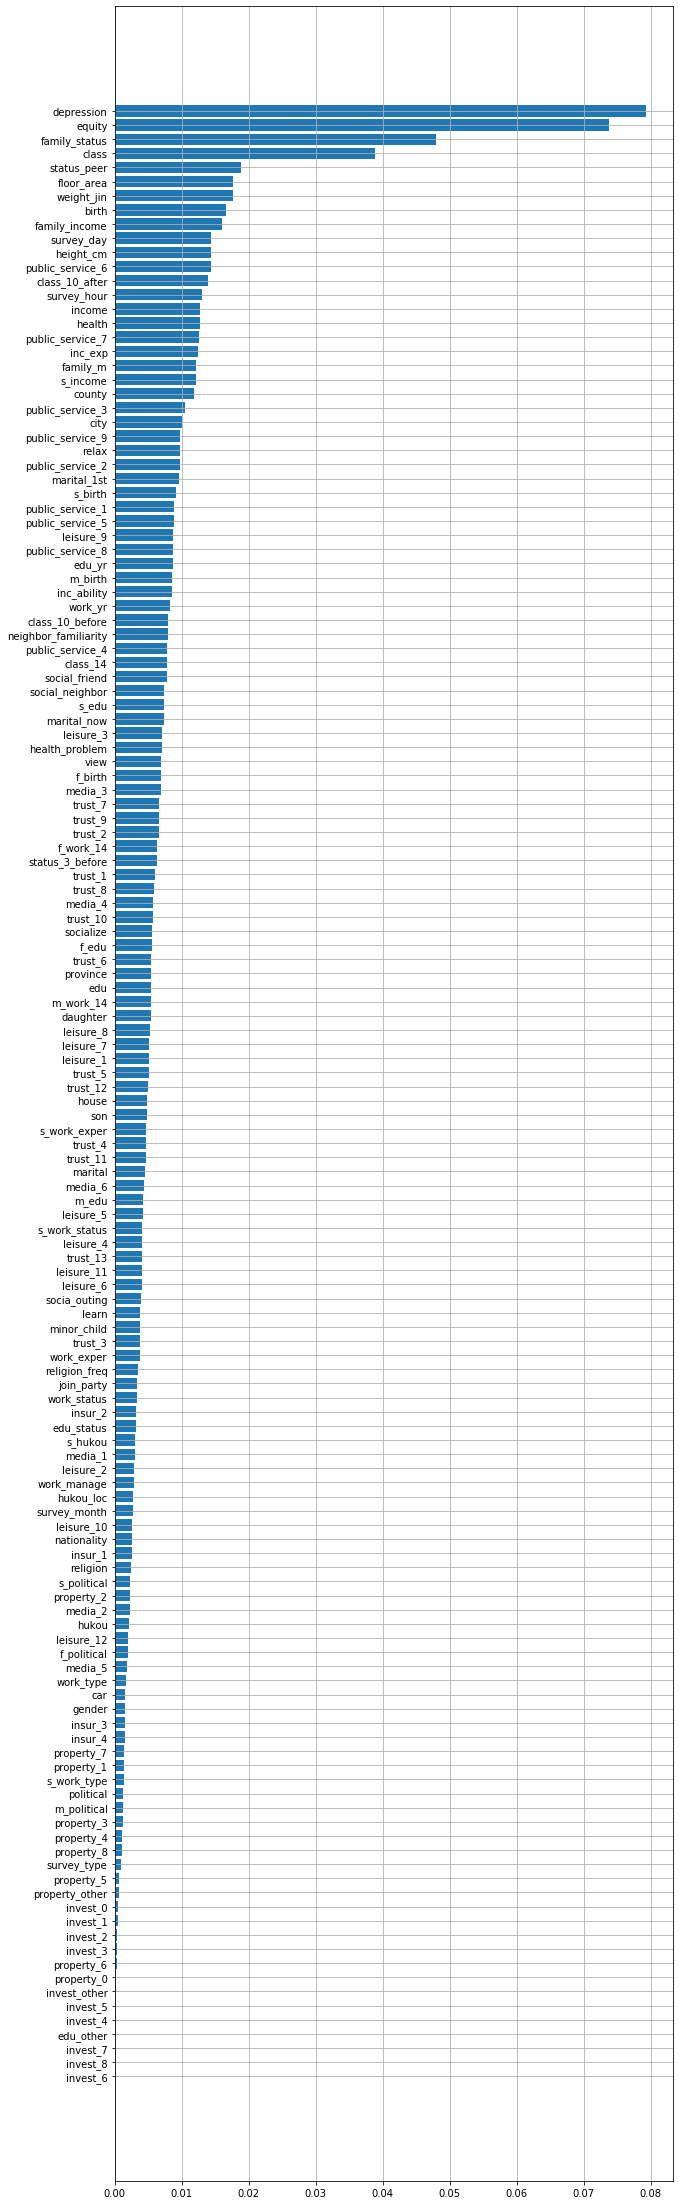

In [160]:
from sklearn import metrics
from sklearn import ensemble
from sklearn import model_selection
#=============
#7、随机森林
#=============

clf7=ensemble.RandomForestRegressor(n_estimators=20,n_jobs=-1)   
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf7.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('Tree:')
print(mes)
print(np.mean(mes))
print()
print()


#结论：效果一般，之后考虑调参


#=============
#看一下特征重要程度排序
import matplotlib.pyplot as plt
%matplotlib inline

a=ensemble.RandomForestRegressor(n_estimators=20).fit(X,Y).feature_importances_
temp=np.argsort(a)  #返回index

a=list(a)
a.sort()

b=[]
for i in temp:
    b.append(X.columns[i])

plt.figure(figsize=(10,40))
plt.grid()
plt.barh(b,a,)

#参数结论：
# 1、edu_other、property_other、invest_other这三项转换数据都不太重要，而且property、invest的各项数据似乎都不重要
# 2、前十项中equity、depresion反映社会态度和心态；
#     class、family_income、floor_area反映财富;
#     birth、marital_1st、weight_jin、country反映客观状态
#     survey_day为什么也会有影响，这是一个最有疑问的指标
    

Tree:
[0.4391141606925498, 0.5194493786812098, 0.42116621991563796, 0.482818518786183, 0.46288322170942975, 0.46249584658601, 0.47523483110834525, 0.4769674777232581, 0.4947960312223633, 0.4573512385190806]
0.46922769249440677




<BarContainer object of 140 artists>

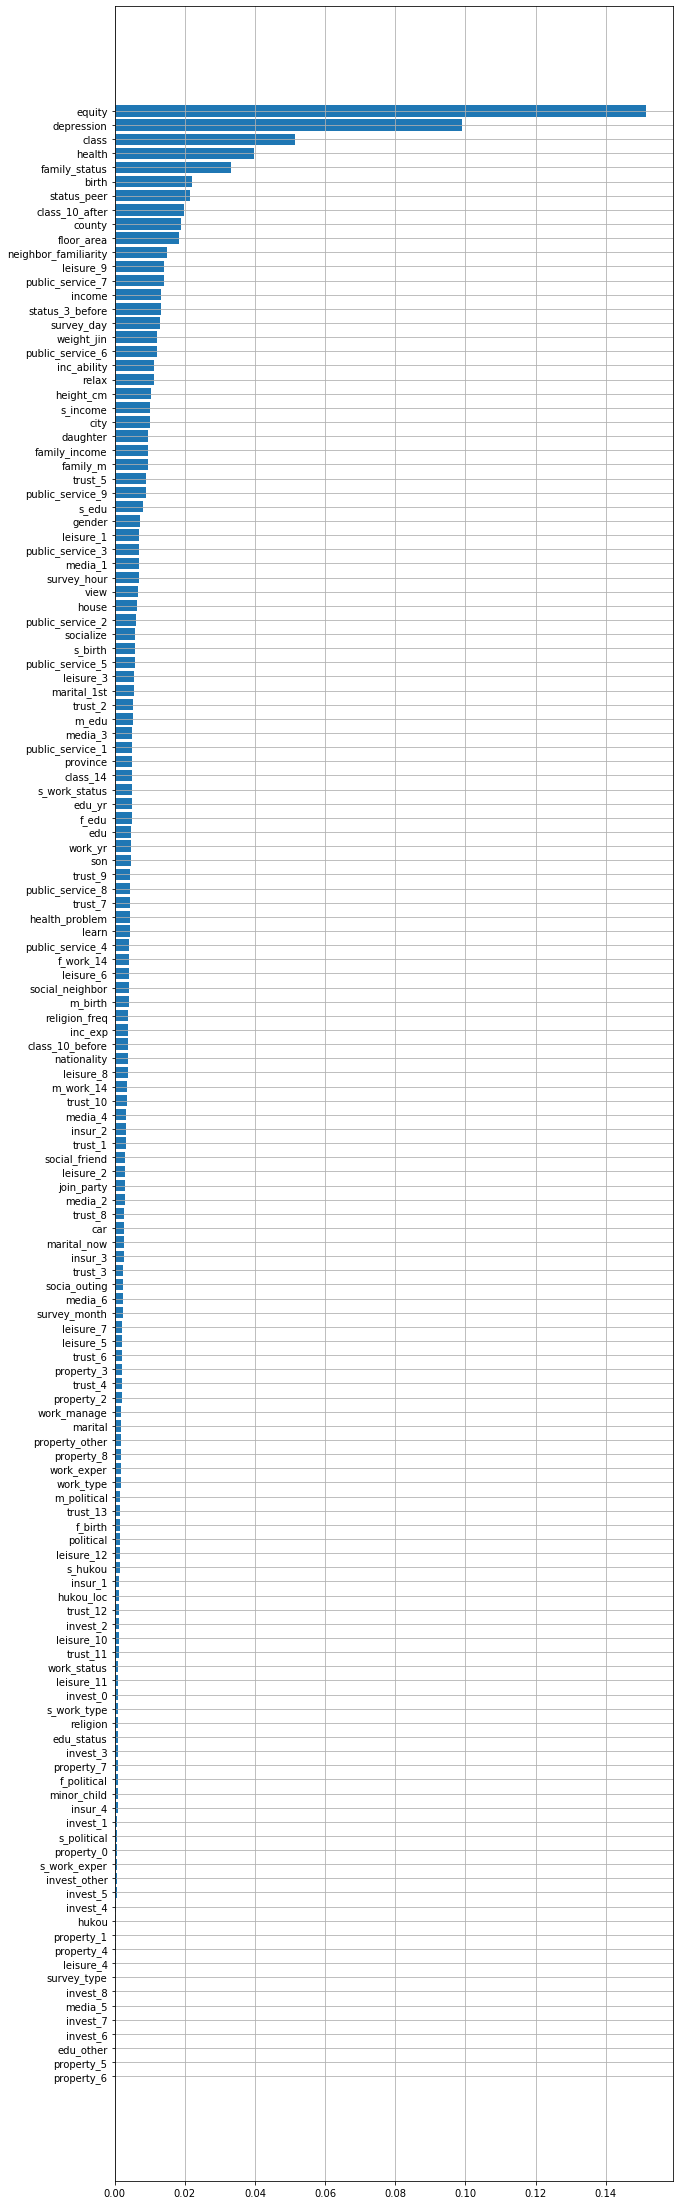

In [158]:
from sklearn import metrics
from sklearn import ensemble
from sklearn import model_selection
#=============
#8、gdbt
#=============
clf8=ensemble.GradientBoostingRegressor(max_features=20)   #必须要设置参数，不然跑太慢了
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf8.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('Tree:')
print(mes)
print(np.mean(mes))
print()
print()


#结论：效果挺好



#=============
#看一下特征重要程度排序
import matplotlib.pyplot as plt
%matplotlib inline

a=ensemble.GradientBoostingClassifier().fit(X,Y).feature_importances_
temp=np.argsort(a)  #返回index

a=list(a)
a.sort()

b=[]
for i in temp:
    b.append(X.columns[i])

plt.figure(figsize=(10,40))
plt.grid()
plt.barh(b,a,)



/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:06:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:06:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:06:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:06:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:06:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:06:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:06:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:06:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:06:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:06:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Tree:
[0.4735560094313686, 0.48109214775704173, 0.4761320121049017, 0.45177037899497835, 0.5046152350154418, 0.4748597413751928, 0.4421672917691235, 0.4615153990512192, 0.4250864411623621, 0.4873279661237024]
0.4678122622785333


[04:07:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


<BarContainer object of 140 artists>

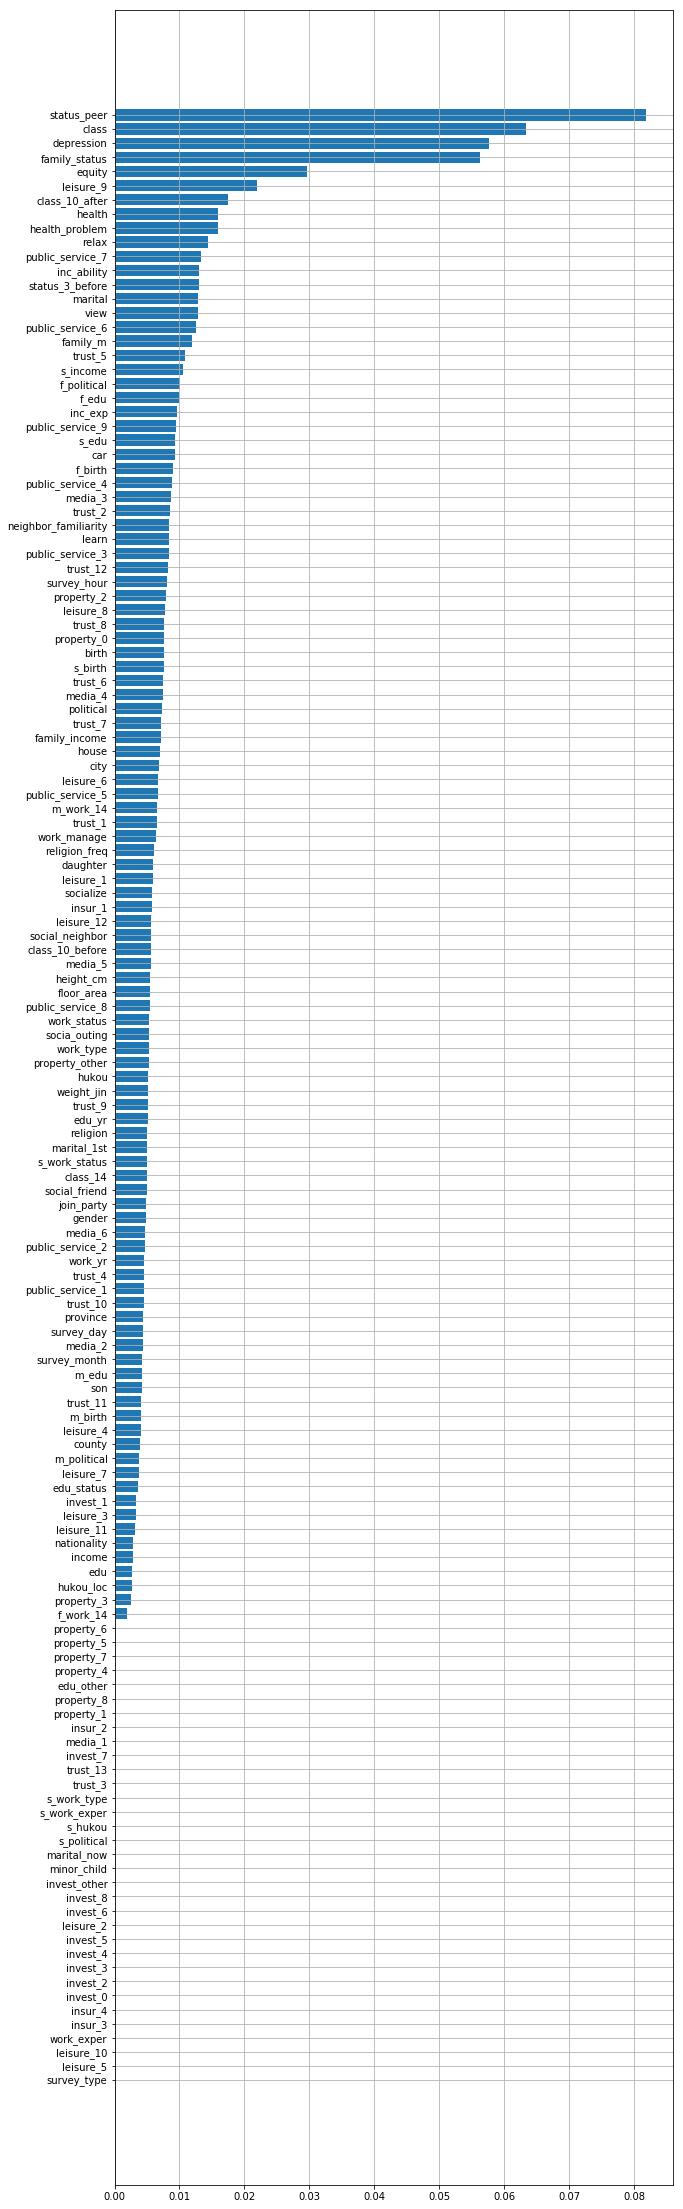

In [148]:
from sklearn import metrics
import xgboost
from sklearn import model_selection
#=============
#9、xgboost
#=============

clf9=xgboost.XGBRegressor()   
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf9.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('Tree:')
print(mes)
print(np.mean(mes))
print()
print()


#结论：简直无语，一来就取得这么好的效果。。。。。


#=============
#看一下特征重要程度排序
import matplotlib.pyplot as plt
%matplotlib inline

a=xgboost.XGBRegressor().fit(X,Y).feature_importances_
temp=np.argsort(a)  #返回index

a=list(a)
a.sort()

b=[]
for i in temp:
    b.append(X.columns[i])

plt.figure(figsize=(10,40))
plt.grid()
plt.barh(b,a,)

Tree:
[0.4758992072460605, 0.4623989940643615, 0.5257504181944493, 0.4354997806626458, 0.40950658792904837, 0.5074472517621642, 0.45220153547546876, 0.5103729336905612, 0.48757693167220967, 0.44904959632882524]
0.4715703237025794




<BarContainer object of 140 artists>

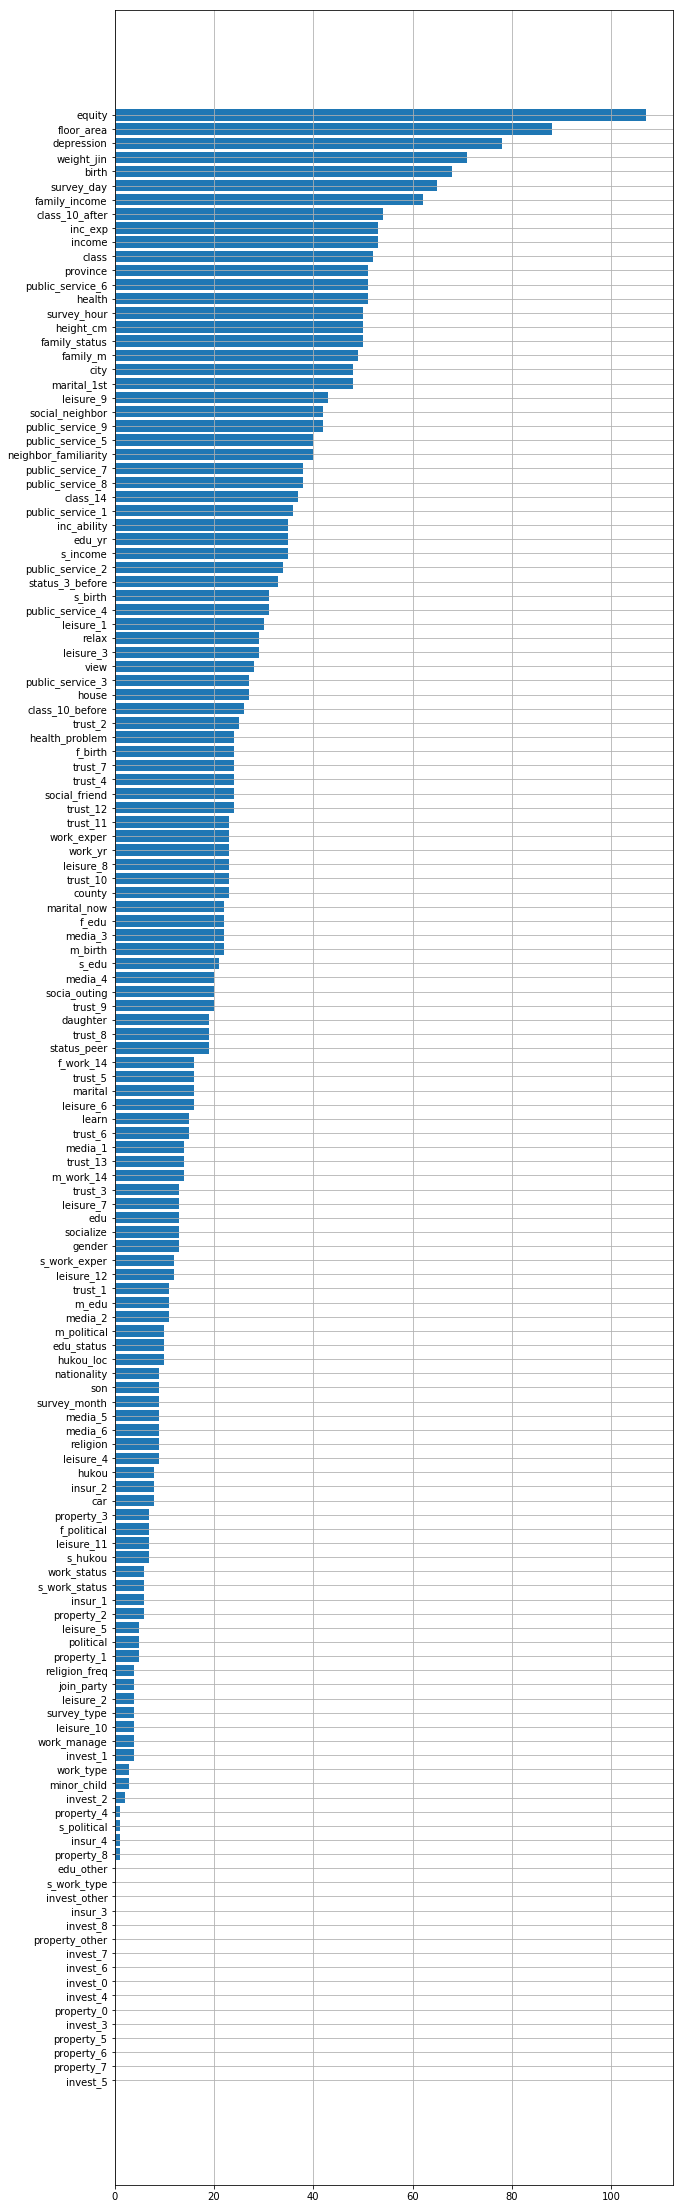

In [2]:
from sklearn import metrics
import lightgbm
from sklearn import model_selection
#lighgbm防报错
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#=============
#10、LightGBM
#=============

clf10=lightgbm.LGBMRegressor()   
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf10.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('Tree:')
print(mes)
print(np.mean(mes))
print()
print()


#结论：效果也很好，之后再调参。。。。。


#=============
#看一下特征重要程度排序
import matplotlib.pyplot as plt
%matplotlib inline

a=lightgbm.LGBMRegressor().fit(X,Y).feature_importances_
temp=np.argsort(a)  #返回index

a=list(a)
a.sort()

b=[]
for i in temp:
    b.append(X.columns[i])

plt.figure(figsize=(10,40))
plt.grid()
plt.barh(b,a,)

In [286]:
df1=pd.read_csv(r'/Users/ranmo/Desktop/天池/幸福感/happiness_test_complete.csv',encoding='GB2312',index_col='id')

    
    
#转化四列数据，转换后df全为数值格式
df1["survey_month"] = df1["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[1]).astype("int64")   #返回调查月：用空格来切分日期和时间，日期中第1项为月
df1["survey_day"] = df1["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[2]).astype("int64")   #返回调查日
df1["survey_hour"] = df1["survey_time"].transform(lambda line:line.split(" ")[1].split(":")[0]).astype("int64")   #返回调查小时
df1=df1.drop(columns='survey_time')



def temp1(a):
    if a not in enc1.categories_[0]:
        return 0
    else:
        return a
df1['edu_other']=enc1.transform(df1['edu_other'].transform(temp1).transform(lambda x:str(x)).values.reshape(-1,1))

def temp2(a):
    if a not in enc2.categories_[0]:
        return 0
    else:
        return a
df1['property_other']=enc2.transform(df1['property_other'].transform(temp2).transform(lambda x:str(x)).values.reshape(-1,1))

def temp3(a):
    if a not in enc3.categories_[0]:
        return 0
    else:
        return a
df1['invest_other']=enc3.transform(df1['invest_other'].transform(temp2).transform(lambda x:str(x)).values.reshape(-1,1))



#确定X_test
X_test=df1.fillna(0)

# 结果1
y_test=xgboost.XGBRegressor().fit(X,Y).predict(X_test)
df1_final=pd.DataFrame({'id':X_test.index,'happiness':y_test}).set_index('id')
df1_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/df1_final.csv')
# 结果1四舍五入
df1_final_round=pd.DataFrame({'id':X_test.index,'happiness':np.round(y_test)}).set_index('id')
df1_final_round.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/df1_final_round.csv')


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[03:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [3]:
#下面开始调参数，原始的X和Y，现在被定义为X_train和y_train
X_train=X
y_train=Y

In [11]:
clf9=xgboost.XGBRegressor(loss_function='RMSE')
clf=model_selection.GridSearchCV(clf9,{'max_depth':np.array([3])},cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_train_score']:=%s"%clf.cv_results_['mean_train_score'])
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:56:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_train_score']:=[-0.39670606]
clf.cv_results_['mean_test_score']:=[-0.46655235]


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [13]:
#粗调max_depth 和 min_weight 
param_test= {
 'max_depth':range(1,10,2),
 'min_child_weight':range(1,6,2)
}

clf=model_selection.GridSearchCV(clf9,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_train_score']:=%s"%clf.cv_results_['mean_train_score'])
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

print()
print(clf.best_params_)

#结论：{'max_depth': 3, 'min_child_weight': 1}

[00:59:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_train_score']:=[-0.49085846 -0.49085846 -0.49085846 -0.39670606 -0.39696458 -0.39764753
 -0.26002677 -0.26143129 -0.26502481 -0.11426667 -0.12203538 -0.12577597
 -0.03290071 -0.03745089 -0.04318397]
clf.cv_results_['mean_test_score']:=[-0.49735128 -0.49735128 -0.49735128 -0.46655235 -0.46700704 -0.46840888
 -0.46705241 -0.46693704 -0.46944426 -0.47785879 -0.47601661 -0.4732868
 -0.48490015 -0.48392962 -0.48191012]

{'max_depth': 3, 'min_child_weight': 1}


In [15]:
#精调max_depth 和 min_weight 
param_test = {
 'max_depth':[2,3,4],
 'min_child_weight':[0.5,1,1.5,2]
}

clf=model_selection.GridSearchCV(clf9,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print(clf.best_score_)
print(clf.best_params_)

#结论：{'max_depth': 4, 'min_child_weight': 0.5}

[01:02:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-0.4650772268790966
{'max_depth': 4, 'min_child_weight': 0.5}


In [16]:
#粗调gamma
param_test = {
'max_depth':np.array([4]),
'min_child_weight':np.array([0.5]),
'gamma':np.arange(0,0.5,0.1)
}

clf=model_selection.GridSearchCV(clf9,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_train_score']:=%s"%clf.cv_results_['mean_train_score'])
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

print(clf.best_score_)
print(clf.best_params_)

#结论：{'gamma': 0.4, 'max_depth': 4, 'min_child_weight': 0.5}

[01:04:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_train_score']:=[-0.333729   -0.33253444 -0.33321262 -0.33383168 -0.33332974]
clf.cv_results_['mean_test_score']:=[-0.46507723 -0.46613101 -0.46608988 -0.46607488 -0.46502697]
-0.46502697431497103
{'gamma': 0.4, 'max_depth': 4, 'min_child_weight': 0.5}


In [18]:
#粗调subsample 和 colsample_bytree
param_test = {
'max_depth':np.array([4]),
'min_child_weight':np.array([0.5]),
'gamma':np.array([0.4]),
'subsample':np.arange(0.6,1,0.1),
'colsample_bytree':np.arange(0.6,1,0.1)  
}

clf=model_selection.GridSearchCV(clf9,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_train_score']:=%s"%clf.cv_results_['mean_train_score'])
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.7999999999999999, 'gamma': 0.4, 'max_depth': 4, 'min_child_weight': 0.5, 'subsample': 0.7}

[01:11:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_train_score']:=[-0.34109051 -0.33883236 -0.33835874 -0.33687477 -0.3384266  -0.33712293
 -0.33631222 -0.33455941 -0.33717121 -0.33631231 -0.33478105 -0.33460805
 -0.33564804 -0.33361313 -0.33405669 -0.33265596]
clf.cv_results_['mean_test_score']:=[-0.46618322 -0.46269655 -0.46253599 -0.46367747 -0.46775283 -0.46308112
 -0.4622309  -0.46520809 -0.46481102 -0.46049934 -0.46327854 -0.46536834
 -0.46665414 -0.4617037  -0.46589955 -0.46556071]
-0.460499337171024
{'colsample_bytree': 0.7999999999999999, 'gamma': 0.4, 'max_depth': 4, 'min_child_weight': 0.5, 'subsample': 0.7}


In [19]:
#精调subsample 和 colsample_bytree
param_test = {
'max_depth':np.array([4]),
'min_child_weight':np.array([0.5]),
'gamma':np.array([0.4]),
'subsample':np.arange(0.65,0.76,0.05),
'colsample_bytree':np.arange(0.75,0.86,0.05)  
}

clf=model_selection.GridSearchCV(clf9,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_train_score']:=%s"%clf.cv_results_['mean_train_score'])
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.8, 'gamma': 0.4, 'max_depth': 4, 'min_child_weight': 0.5, 'subsample': 0.7000000000000001}

[01:13:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_train_score']:=[-0.33750656 -0.33602175 -0.33610601 -0.33656922 -0.33631231 -0.33449993
 -0.33589438 -0.33402379 -0.33456687]
clf.cv_results_['mean_test_score']:=[-0.46317367 -0.46421364 -0.46442132 -0.46070957 -0.46049934 -0.4637039
 -0.46557355 -0.46090864 -0.46352731]
-0.460499337171024
{'colsample_bytree': 0.8, 'gamma': 0.4, 'max_depth': 4, 'min_child_weight': 0.5, 'subsample': 0.7000000000000001}


In [20]:
#粗调reg_alpha和reg_lambda
param_test = {
'max_depth':np.array([4]),
'min_child_weight':np.array([0.5]),
'gamma':np.array([0.4]),
'subsample':np.array([0.7]),
'colsample_bytree':np.array([0.8]),  
'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]  
}

clf=model_selection.GridSearchCV(clf9,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_train_score']:=%s"%clf.cv_results_['mean_train_score'])
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.8, 'gamma': 0.4, 'max_depth': 4, 'min_child_weight': 0.5, 'reg_alpha': 1, 'reg_lambda': 1e-05, 'subsample': 0.7}

[01:18:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_train_score']:=[-0.3323698  -0.33263987 -0.33314257 -0.33631238 -0.39068836 -0.33274289
 -0.33244836 -0.3335777  -0.33635162 -0.39069156 -0.33223741 -0.33267268
 -0.33286902 -0.33602014 -0.39078201 -0.33480055 -0.33524465 -0.33547547
 -0.33877373 -0.39218788 -0.46523608 -0.46523626 -0.4652707  -0.46541092
 -0.46897862]
clf.cv_results_['mean_test_score']:=[-0.46618397 -0.46607476 -0.46522425 -0.46049933 -0.46570105 -0.46649907
 -0.46601566 -0.4644853  -0.46127039 -0.46542281 -0.4649231  -0.46586465
 -0.46535288 -0.46428868 -0.46535429 -0.46005374 -0.46055601 -0.4615433
 -0.46253262 -0.46639289 -0.4907392  -0.49073934 -0.49074212 -0.49064287
 -0.4924003 ]
-0.4600537439369267
{'colsample_bytree': 0.8, 'gamma': 0.4, 'max_depth': 4, 'min_child_weight': 0.5, 'reg_alpha': 1, 'reg_lambda': 1e-05, 'subsample': 0.7}


In [21]:
#精调reg_alpha和reg_lambda
param_test = {
'max_depth':np.array([4]),
'min_child_weight':np.array([0.5]),
'gamma':np.array([0.4]),
'subsample':np.array([0.7]),
'colsample_bytree':np.array([0.8]),  
'reg_alpha':[0,0.5,1,2,5],
'reg_lambda':[0,1e-06,1e-05,1e-04,1e-03]  
}

clf=model_selection.GridSearchCV(clf9,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_train_score']:=%s"%clf.cv_results_['mean_train_score'])
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.8, 'gamma': 0.4, 'max_depth': 4, 'min_child_weight': 0.5, 'reg_alpha': 1, 'reg_lambda': 0.001, 'subsample': 0.7}

[01:26:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_train_score']:=[-0.3323696  -0.33236961 -0.33236971 -0.33237065 -0.33247008 -0.33279181
 -0.33279182 -0.33279188 -0.33279245 -0.33279849 -0.33480051 -0.33480051
 -0.33480055 -0.33480092 -0.33502835 -0.34037336 -0.34037336 -0.34037338
 -0.34037358 -0.34037566 -0.357529   -0.35752901 -0.35752901 -0.35752909
 -0.35752544]
clf.cv_results_['mean_test_score']:=[-0.46618402 -0.46618402 -0.46618398 -0.46618365 -0.4662238  -0.46179072
 -0.46179071 -0.4617907  -0.46179059 -0.46194671 -0.46005375 -0.46005375
 -0.46005374 -0.46005369 -0.45922491 -0.46244928 -0.46244928 -0.46244928
 -0.46244925 -0.46244901 -0.46371127 -0.46371127 -0.46371127 -0.46371126
 -0.46364974]
-0.45922491091195655
{'colsample_bytree': 0.8, 'gamma': 0.4, 'max_depth': 4, 'min_child_weight': 0.5, 'reg_alpha': 1, 'reg_lambda': 0.001, 'subsample': 0.7}


In [26]:
#降低学习率
param_test = {
'max_depth':np.array([4]),
'min_child_weight':np.array([0.5]),
'gamma':np.array([0.4]),
'subsample':np.array([0.7]),
'colsample_bytree':np.array([0.8]),  
'reg_alpha':np.array([1]),
'reg_lambda':np.array([0.001]) ,
'learning_rate':[0.001,0.01,0.1,0.5],
 
    
}


clf9=xgboost.XGBRegressor(loss_function='RMSE')
clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_train_score']:=%s"%clf.cv_results_['mean_train_score'])
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 0.5, 'reg_alpha': 1, 'reg_lambda': 0.001, 'subsample': 0.7}

[01:44:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_train_score']:=[-9.93134454 -2.03785989 -0.33502835 -0.18566559]
clf.cv_results_['mean_test_score']:=[-9.9337412  -2.05872707 -0.45922491 -0.58291858]
-0.45922491091195655
{'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 0.5, 'reg_alpha': 1, 'reg_lambda': 0.001, 'subsample': 0.7}


In [30]:
#降低学习率
param_test = {
'max_depth':np.array([4]),
'min_child_weight':np.array([0.5]),
'gamma':np.array([0.4]),
'subsample':np.array([0.7]),
'colsample_bytree':np.array([0.8]),  
'reg_alpha':np.array([1]),
'reg_lambda':np.array([0.001]) ,
'learning_rate':[0.09,0.095,0.1,0.105,0.11],
 
    
}


clf9=xgboost.XGBRegressor(loss_function='RMSE')
clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_train_score']:=%s"%clf.cv_results_['mean_train_score'])
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 0.5, 'reg_alpha': 1, 'reg_lambda': 0.001, 'subsample': 0.7}

[01:51:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_train_score']:=[-0.34385415 -0.33945839 -0.33502835 -0.33088304 -0.32713217]
clf.cv_results_['mean_test_score']:=[-0.4611279  -0.46104233 -0.45922491 -0.4649306  -0.46426149]
-0.45922491091195655
{'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 0.5, 'reg_alpha': 1, 'reg_lambda': 0.001, 'subsample': 0.7}


In [31]:
#增加估计器
param_test = {
'max_depth':np.array([4]),
'min_child_weight':np.array([0.5]),
'gamma':np.array([0.4]),
'subsample':np.array([0.7]),
'colsample_bytree':np.array([0.8]),  
'reg_alpha':np.array([1]),
'reg_lambda':np.array([0.001]) ,
'learning_rate':np.array([0.1]),
'n_estimators=100':[50,100,500,1000]
    
}


clf9=xgboost.XGBRegressor(loss_function='RMSE')
clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_train_score']:=%s"%clf.cv_results_['mean_train_score'])
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 0.5, 'n_estimators=100': 50, 'reg_alpha': 1, 'reg_lambda': 0.001, 'subsample': 0.7}

[01:52:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_train_score']:=[-0.33502835 -0.33502835 -0.33502835 -0.33502835]
clf.cv_results_['mean_test_score']:=[-0.45922491 -0.45922491 -0.45922491 -0.45922491]
-0.45922491091195655
{'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 0.5, 'n_estimators=100': 50, 'reg_alpha': 1, 'reg_lambda': 0.001, 'subsample': 0.7}


In [348]:
#增加估计器
param_test = {
'max_depth':np.array([4]),
'min_child_weight':np.array([0.5]),
'gamma':np.array([0.4]),
'subsample':np.array([0.7]),
'colsample_bytree':np.array([0.8]),  
'reg_alpha':np.array([1]),
'reg_lambda':np.array([0.001]) ,
'learning_rate':np.array([0.1]),
'n_estimators=100':np.array([100])
    
}


clf9=xgboost.XGBRegressor(loss_function='RMSE')
clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_train_score']:=%s"%clf.cv_results_['mean_train_score'])
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 0.5, 'n_estimators=100': 50, 'reg_alpha': 1, 'reg_lambda': 0.001, 'subsample': 0.7}

[13:33:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_train_score']:=[-0.3349583]
clf.cv_results_['mean_test_score']:=[-0.46248168]
-0.46248168423785585
{'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 0.5, 'n_estimators=100': 100, 'reg_alpha': 1, 'reg_lambda': 0.001, 'subsample': 0.7}


In [32]:
# 结果2
y_test=xgboost.XGBRegressor(max_depth=4,min_child_weight=0.5,gamma=0.4,subsample=0.7,colsample_bytree=0.8,reg_alpha=1,reg_lambda=0.001).fit(X,Y).predict(X_test)
df2_final=pd.DataFrame({'id':X_test.index,'happiness':y_test}).set_index('id')
df2_final.to_csv('/Users/ranmo/Desktop/天池/幸福感/df22_final.csv')
# 结果2四舍五入
df2_final_round=pd.DataFrame({'id':X_test.index,'happiness':np.round(y_test)}).set_index('id')
df2_final_round.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/df22_final_round.csv')

[01:55:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


NameError: name 'X_test' is not defined

In [21]:
df1=pd.read_csv(r'/Users/ranmo/Desktop/天池/幸福感/happiness_test_complete.csv',encoding='GB2312',index_col='id')

    
    
#转化四列数据，转换后df全为数值格式
df1["survey_month"] = df1["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[1]).astype("int64")   #返回调查月：用空格来切分日期和时间，日期中第1项为月
df1["survey_day"] = df1["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[2]).astype("int64")   #返回调查日
df1["survey_hour"] = df1["survey_time"].transform(lambda line:line.split(" ")[1].split(":")[0]).astype("int64")   #返回调查小时
df1=df1.drop(columns='survey_time')



def temp1(a):
    if a not in enc1.categories_[0]:
        return 0
    else:
        return a
df1['edu_other']=enc1.transform(df1['edu_other'].transform(temp1).transform(lambda x:str(x)).values.reshape(-1,1))

def temp2(a):
    if a not in enc2.categories_[0]:
        return 0
    else:
        return a
df1['property_other']=enc2.transform(df1['property_other'].transform(temp2).transform(lambda x:str(x)).values.reshape(-1,1))

def temp3(a):
    if a not in enc3.categories_[0]:
        return 0
    else:
        return a
df1['invest_other']=enc3.transform(df1['invest_other'].transform(temp2).transform(lambda x:str(x)).values.reshape(-1,1))



#确定X_test
X_test=df1.fillna(0)





# 结果2

from sklearn import metrics
import xgboost
from sklearn import model_selection
from sklearn.externals import joblib
#=============
#xgboost_modified
#=============

clf_xgboost_modified=xgboost.XGBRegressor(max_depth=4,min_child_weight=0.5,gamma=0.4,subsample=0.7,colsample_bytree=0.8,reg_alpha=1,reg_lambda=0.001)   
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]
i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X_train):
    X_train1 = X_train.iloc[train]
    y_train1 = y_train.iloc[train]
    X_test1 = X_train.iloc[test]
    y_test1 = y_train.iloc[test]
    
    clf_xgboost_modified.fit(X_train1,y_train1)
    y_pred=clf_xgboost_modified.predict(X_test1)
    e1=metrics.mean_squared_error(y_pred,y_test1)
    mes.append(e1)
    joblib.dump(clf_xgboost_modified,filename=r'/Users/ranmo/Desktop/天池/幸福感/xgboost/xgboost_%d.pkl'%i)
    
    y_test=clf_xgboost_modified.predict(X_test)

    df2_final=pd.DataFrame({'id':X_test.index,'happiness':y_test}).set_index('id')
    df2_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/xgboost/df2_xgboost_%d.csv'%i)
 
    i+=1
print('clf_xgboost_modified:')
print(mes)
print(np.mean(mes))
print()
print()

/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:37:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:37:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:37:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:37:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:37:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:37:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:37:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:37:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:37:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf_xgboost_modified:
[0.46399100303086616, 0.428027814408696, 0.46616150230273606, 0.47571608454203484, 0.4826082741345075, 0.4920292403727474, 0.4469047947654382, 0.4749939533357052, 0.5217752098659296, 0.4282769868698932]
0.46804848636285534




In [38]:
#=============
#LightGBM_modified
#=============

#直接按初始参数跑基本模型
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}
clf=model_selection.GridSearchCV(clf10,{'max_depth':np.array([-1])},cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])


clf.cv_results_['mean_test_score']:=[-0.46828459]


In [44]:
#基模型选择
param_test = {
'boosting_type':['gbdt','dart','goss'],    #rf有问题，跑不动 
}

clf=model_selection.GridSearchCV(clf10,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

print(clf.best_score_)
print(clf.best_params_)

# 结论：采用gdbt

clf.cv_results_['mean_test_score']:=[-4.77283212e-01 -6.37409288e-01 -6.89327306e+67]
-0.477283211936487
{'boosting_type': 'gbdt'}


In [39]:
#粗调max_depth 和 min_weight 
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}

param_test = {
 'max_depth':range(1,10,2),
 'min_child_weight':[0.001,0.01,1,10]   #样本权重之和阈值，防止过拟合。但这个xgboost是默认为1，lightgbm为什么默认0.001，可能是以为lightgbm本身就是简化模型，所以对权重要求比较高。
}

clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'max_depth': 7, 'min_child_weight': 0.001}

clf.cv_results_['mean_test_score']:=[-0.4973359  -0.4973359  -0.4973359  -0.4973359  -0.46576348 -0.46576348
 -0.46576348 -0.46576348 -0.46650485 -0.46650485 -0.46650485 -0.46650485
 -0.46498389 -0.46498389 -0.46498389 -0.46498389 -0.46618896 -0.46618896
 -0.46618896 -0.46618896]
-0.4649838921660704
{'max_depth': 7, 'min_child_weight': 0.001}


In [40]:
#精调max_depth 和 min_weight 
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}

param_test = {
 'max_depth':range(5,10,1),
 'min_child_weight':np.arange(0,0.0021,0.0005)  #样本权重之和阈值，防止过拟合。但这个xgboost是默认为1，lightgbm为什么默认0.001，可能是以为lightgbm本身就是简化模型，所以对权重要求比较高。
}

clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'max_depth': 7, 'min_child_weight': 0.0}

clf.cv_results_['mean_test_score']:=[-0.46650485 -0.46650485 -0.46650485 -0.46650485 -0.46650485 -0.46745657
 -0.46745657 -0.46745657 -0.46745657 -0.46745657 -0.46498389 -0.46498389
 -0.46498389 -0.46498389 -0.46498389 -0.46686071 -0.46686071 -0.46686071
 -0.46686071 -0.46686071 -0.46618896 -0.46618896 -0.46618896 -0.46618896
 -0.46618896]
-0.4649838921660704
{'max_depth': 7, 'min_child_weight': 0.0}


In [47]:
#粗调min_split_gain ,相当于gamma
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}

param_test = {
 'max_depth':np.array([7]),
 'min_child_weight':np.array([0]),
 'min_split_gain':np.arange(0,0.5,0.1),

}

clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1}




clf.cv_results_['mean_test_score']:=[-0.46498389 -0.46351598 -0.46475936 -0.46692426 -0.46526196]
-0.46351598103147273
{'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1}


In [48]:
#精调min_split_gain ,相当于gamma
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}

param_test = {
 'max_depth':np.array([7]),
 'min_child_weight':np.array([0]),
 'min_split_gain':np.arange(0.08,0.12,0.01),

}

clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

{'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.09999999999999999}

clf.cv_results_['mean_test_score']:=[-0.4651634  -0.46624496 -0.46351598 -0.46468028]
-0.46351598103147273
{'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.09999999999999999}


In [49]:
#粗调subsample 和 colsample_bytree
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}

param_test = {
 'max_depth':np.array([7]),
 'min_child_weight':np.array([0]),
 'min_split_gain':np.array([0.1]),
 'subsample':np.arange(0.6,1.01,0.1),
 'colsample_bytree':np.arange(0.6,1.01,0.1)  

}

clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'colsample_bytree': 0.7999999999999999, 'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1, 'subsample': 0.6}

clf.cv_results_['mean_test_score']:=[-0.46367637 -0.46367637 -0.46367637 -0.46367637 -0.46367637 -0.46315906
 -0.46315906 -0.46315906 -0.46315906 -0.46315906 -0.46222023 -0.46222023
 -0.46222023 -0.46222023 -0.46222023 -0.46429012 -0.46429012 -0.46429012
 -0.46429012 -0.46429012 -0.46351598 -0.46351598 -0.46351598 -0.46351598
 -0.46351598]
-0.4622202262764654
{'colsample_bytree': 0.7999999999999999, 'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1, 'subsample': 0.6}


In [51]:
#精调subsample 和 colsample_bytree
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}

param_test = {
 'max_depth':np.array([7]),
 'min_child_weight':np.array([0]),
 'min_split_gain':np.array([0.1]),
 'subsample':np.arange(0.5,0.7,0.25),
 'colsample_bytree':np.arange(0.7,0.9,0.02)  

}

clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'colsample_bytree': 0.8, 'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1, 'subsample': 0.5}

clf.cv_results_['mean_test_score']:=[-0.46315906 -0.46526881 -0.46265805 -0.4628917  -0.46518109 -0.46222023
 -0.4662163  -0.46417214 -0.46495979 -0.46319013 -0.4666368 ]
-0.4622202262764654
{'colsample_bytree': 0.8, 'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1, 'subsample': 0.5}


In [52]:
#粗调reg_alpha和reg_lambda
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}

param_test = {
 'max_depth':np.array([7]),
 'min_child_weight':np.array([0]),
 'min_split_gain':np.array([0.1]),
 'subsample':np.array([0.5]),
 'colsample_bytree':np.array([0.8]),
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100],  

}

clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'colsample_bytree': 0.8, 'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1, 'reg_alpha': 1, 'reg_lambda': 1e-05, 'subsample': 0.5}

clf.cv_results_['mean_test_score']:=[-0.46222021 -0.46273606 -0.46438107 -0.4654086  -0.46217048 -0.46871108
 -0.46725928 -0.46504423 -0.46401751 -0.46273016 -0.46202142 -0.46246415
 -0.46349411 -0.46300247 -0.46332565 -0.46149494 -0.46241242 -0.4618642
 -0.46410248 -0.46185755 -0.49170716 -0.49170727 -0.49159926 -0.49150365
 -0.49295416]
-0.46149494208138647
{'colsample_bytree': 0.8, 'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1, 'reg_alpha': 1, 'reg_lambda': 1e-05, 'subsample': 0.5}


In [53]:
#精调reg_alpha和reg_lambda
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}

param_test = {
 'max_depth':np.array([7]),
 'min_child_weight':np.array([0]),
 'min_split_gain':np.array([0.1]),
 'subsample':np.array([0.5]),
 'colsample_bytree':np.array([0.8]),
 'reg_alpha':[0.6,0.8,1,1.2,1.4],
 'reg_lambda':[1e-6, 1e-5,1e-4,1e-3],

}

clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'colsample_bytree': 0.8, 'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1, 'reg_alpha': 1, 'reg_lambda': 0.0001, 'subsample': 0.5}

clf.cv_results_['mean_test_score']:=[-0.46231147 -0.46215298 -0.46215295 -0.46215264 -0.46210907 -0.46210907
 -0.46204523 -0.46319656 -0.46149494 -0.46149494 -0.46149492 -0.46163205
 -0.46412409 -0.46412409 -0.46412406 -0.46412379 -0.46329659 -0.46329659
 -0.46329656 -0.46326844]
-0.4614949164752814
{'colsample_bytree': 0.8, 'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1, 'reg_alpha': 1, 'reg_lambda': 0.0001, 'subsample': 0.5}


In [54]:
#降低学习率
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}

param_test = {
'max_depth':np.array([7]),
'min_child_weight':np.array([0]),
'min_split_gain':np.array([0.1]),
'subsample':np.array([0.5]),
'colsample_bytree':np.array([0.8]), 
'reg_alpha':np.array([1]),
'reg_lambda':np.array([0.0001]) ,
'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.5],
}

clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1, 'reg_alpha': 1, 'reg_lambda': 0.0001, 'subsample': 0.5}

clf.cv_results_['mean_test_score']:=[-0.64342311 -0.57061591 -0.52381724 -0.46240652 -0.46149492 -0.54514176]
-0.4614949164752814
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1, 'reg_alpha': 1, 'reg_lambda': 0.0001, 'subsample': 0.5}


In [55]:
#调试最终结果
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}

param_test = {
'max_depth':np.array([7]),
'min_child_weight':np.array([0]),
'min_split_gain':np.array([0.1]),
'subsample':np.array([0.5]),
'colsample_bytree':np.array([0.8]), 
'reg_alpha':np.array([1]),
'reg_lambda':np.array([0.0001]) ,
'learning_rate':np.array([0.1]),
}

clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 0.0001, 'min_split_gain': 0.4, 'reg_alpha': 1e-05, 'reg_lambda': 0.0001, 'subsample': 0.5}

clf.cv_results_['mean_test_score']:=[-0.46149492]
-0.4614949164752814
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 0, 'min_split_gain': 0.1, 'reg_alpha': 1, 'reg_lambda': 0.0001, 'subsample': 0.5}


In [57]:
df1=pd.read_csv(r'/Users/ranmo/Desktop/天池/幸福感/happiness_test_complete.csv',encoding='GB2312',index_col='id')

    
    
#转化四列数据，转换后df全为数值格式
df1["survey_month"] = df1["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[1]).astype("int64")   #返回调查月：用空格来切分日期和时间，日期中第1项为月
df1["survey_day"] = df1["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[2]).astype("int64")   #返回调查日
df1["survey_hour"] = df1["survey_time"].transform(lambda line:line.split(" ")[1].split(":")[0]).astype("int64")   #返回调查小时
df1=df1.drop(columns='survey_time')



def temp1(a):
    if a not in enc1.categories_[0]:
        return 0
    else:
        return a
df1['edu_other']=enc1.transform(df1['edu_other'].transform(temp1).transform(lambda x:str(x)).values.reshape(-1,1))

def temp2(a):
    if a not in enc2.categories_[0]:
        return 0
    else:
        return a
df1['property_other']=enc2.transform(df1['property_other'].transform(temp2).transform(lambda x:str(x)).values.reshape(-1,1))

def temp3(a):
    if a not in enc3.categories_[0]:
        return 0
    else:
        return a
df1['invest_other']=enc3.transform(df1['invest_other'].transform(temp2).transform(lambda x:str(x)).values.reshape(-1,1))



#确定X_test
X_test=df1.fillna(0)



# 结果3

from sklearn import metrics
import lightgbm
from sklearn import model_selection
from sklearn.externals import joblib
#=============
#lightgbm_modified
#=============

clf_lightgbm_modified=lightgbm.LGBMRegressor(metric='l2',colsample_bytree=0.8,learning_rate=0.1,
                                             max_depth=7,min_child_weight=0,min_split_gain=0.1,
                                             reg_alpha=1,reg_lambda=0.0001,subsample=0.5)   
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]
i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X_train):
    X_train1 = X_train.iloc[train]
    y_train1 = y_train.iloc[train]
    X_test1 = X_train.iloc[test]
    y_test1 = y_train.iloc[test]
    
    clf_lightgbm_modified.fit(X_train1,y_train1)
    y_pred=clf_lightgbm_modified.predict(X_test1)
    e1=metrics.mean_squared_error(y_pred,y_test1)
    mes.append(e1)
    joblib.dump(clf_lightgbm_modified,filename=r'/Users/ranmo/Desktop/天池/幸福感/lightgbm/lightgbm_%d.pkl'%i)
    
    y_test=clf_lightgbm_modified.predict(X_test)

    df3_final=pd.DataFrame({'id':X_test.index,'happiness':y_test}).set_index('id')
    df3_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/lightgbm/df3_lightgbm_%d.csv'%i)
 
    i+=1
print('clf_lightgbm_modified:')
print(mes)
print(np.mean(mes))
print()
print()

clf_lightgbm_modified:
[0.4564130757587571, 0.4844379989035388, 0.49807809939025494, 0.4269147666587961, 0.48131787287135464, 0.4330240701144807, 0.4898650588056021, 0.4705611578491804, 0.43313050465040587, 0.4604775200266268]
0.46342201250289977




In [109]:
df3_lightgbm_6=pd.read_csv(r'C:\Users\sunsharp\Desktop\学习\幸福感\lightgbm\df3_lightgbm_6.csv',encoding='GB2312',index_col='id')
df3_lightgbm_6_new=df3_lightgbm_6
for i in df3_lightgbm_6_new.index:
    if (abs(np.round(df3_lightgbm_6_new.loc[i])-df3_lightgbm_6_new.loc[i])<=0.2)['happiness']:
        df3_lightgbm_6_new.loc[i]=np.round(df3_lightgbm_6_new.loc[i])
df3_lightgbm_6_new.to_csv(r'C:\Users\sunsharp\Desktop\学习\幸福感\lightgbm\df3_lightgbm_6_new.csv')

#将结果小范围调整为整数后，结果反而变差了。

<bound method DataFrame.max of        happiness
id              
8001    3.808798
8002    2.979758
8003    3.523905
8004    4.273081
8005    3.396594
8006    4.153707
8007    3.865946
8008    4.416047
8009    4.043941
8010    2.863396
8011    3.106690
8012    3.828265
8013    4.269976
8014    3.597801
8015    3.769028
8016    4.482618
8017    3.593035
8018    4.367090
8019    3.851549
8020    4.009507
8021    3.991283
8022    3.682439
8023    4.013418
8024    3.656173
8025    3.390661
8026    4.035932
8027    4.209509
8028    3.898602
8029    4.280363
8030    4.185516
...          ...
10939   4.675981
10940   3.988157
10941   3.710848
10942   3.799397
10943   3.802738
10944   2.867199
10945   2.817250
10946   3.992106
10947   4.328801
10948   3.717129
10949   4.479064
10950   4.187254
10951   3.833655
10952   4.221771
10953   3.751441
10954   3.878646
10955   3.576330
10956   3.170835
10957   3.988528
10958   4.222291
10959   4.227424
10960   4.302723
10961   4.101443
10962   4.035561


In [163]:
#=============
#GDBT_modified
#=============

#直接按初始参数跑基本模型
clf8=ensemble.GradientBoostingRegressor(loss='ls')   
clf=model_selection.GridSearchCV(clf8,{'max_depth':np.array([3])},cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])


clf.cv_results_['mean_test_score']:=[-0.47534395]


In [173]:
#粗调max_depth 和 min_weight_fraction_leaf 
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':range(1,10,2),
 'min_weight_fraction_leaf':[0.0001,0.001,0.01,0.1,0.5],    #不清楚GDBT里面权重的尺度一般是多少
 'max_features':np.array([20]),      #为了提升速度
 'learning_rate':np.array([0.3]),    #为了提升速度
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 3, 'max_features': 20, 'min_weight_fraction_leaf': 0.01}

clf.cv_results_['mean_test_score']:=[-0.48237971 -0.48221967 -0.48418739 -0.49337655 -0.67408061 -0.49080001
 -0.48796203 -0.47909174 -0.48227649 -0.67408061 -0.52420447 -0.50954108
 -0.49456345 -0.48246376 -0.67408061 -0.55128261 -0.54021101 -0.51314994
 -0.48729119 -0.67408061 -0.56118711 -0.54673575 -0.52691447 -0.4861345
 -0.67408061]
-0.47909173806706834
{'learning_rate': 0.3, 'max_depth': 3, 'max_features': 20, 'min_weight_fraction_leaf': 0.01}


In [190]:
#精调max_depth 和 min_weight_fraction_leaf 
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':range(1,6,1),
 'min_weight_fraction_leaf':[0.0006,0.0008,0.001,0.002,0.005],    #不清楚GDBT里面权重的尺度一般是多少
 'max_features':np.array([20]),      #为了提升速度
 'learning_rate':np.array([0.3]),    #为了提升速度
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 20, 'min_weight_fraction_leaf': 0.002}

clf.cv_results_['mean_test_score']:=[-0.48311344 -0.48304482 -0.48527311 -0.48280918 -0.48420016 -0.4813512
 -0.47600957 -0.48097458 -0.48060979 -0.4775089  -0.48520319 -0.4837735
 -0.49120825 -0.48713789 -0.4785435  -0.49642967 -0.49465933 -0.50016224
 -0.50354361 -0.49153577 -0.51517917 -0.5169624  -0.51771541 -0.50116265
 -0.50810807]
-0.4760095719749671
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 20, 'min_weight_fraction_leaf': 0.0008}


In [201]:
#粗调min_impurity_split ,相当于gamma
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.002]), 
 'min_impurity_split':np.array([1e-7,1e-6,1e-5,1e-4,1e-3]),   
 'max_features':np.array([20]),      #为了提升速度
 'learning_rate':np.array([0.3]),    #为了提升速度

}

clf=model_selection.GridSearchCV(clf8,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 20, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002}

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

clf.cv_results_['mean_test_score']:=[-0.47788082 -0.47848984 -0.47746957 -0.47542547 -0.48010759]
-0.4754254683255329
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 20, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002}


C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

In [207]:
#粗调subsample 和 max_features (相当于colsample_bytree）
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.002]), 
 'min_impurity_split':np.array([0.0001]),
 'subsample':np.arange(0.5,1.01,0.1),
 'max_features':[0.4,0.6,0.8,1],     
    
 'learning_rate':np.array([0.3]),    #为了提升速度

}

clf=model_selection.GridSearchCV(clf8,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.8, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002, 'subsample': 0.9999999999999999}

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

clf.cv_results_['mean_test_score']:=[-0.48433899 -0.48320745 -0.48511553 -0.47775512 -0.47784408 -0.47946174
 -0.48824756 -0.48298892 -0.4818395  -0.47768854 -0.4791443  -0.47781782
 -0.48809308 -0.48429959 -0.48212756 -0.47818382 -0.47885136 -0.47521674
 -0.52707239 -0.52344178 -0.52129354 -0.52609206 -0.52401609 -0.52839362]
-0.4752167399299448
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.8, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002, 'subsample': 0.9999999999999999}


C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [208]:
#精调subsample 和 max_features (相当于colsample_bytree）
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.002]), 
 'min_impurity_split':np.array([0.0001]),
 'subsample':[0.94,0.96,0.98,1],
 'max_features':[0.86,0.88,0.8,0.82,0.84],     
    
 'learning_rate':np.array([0.3]),    #为了提升速度

}

clf=model_selection.GridSearchCV(clf8,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.88, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002, 'subsample': 0.96}

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

clf.cv_results_['mean_test_score']:=[-0.47843382 -0.47935604 -0.47777414 -0.47453267 -0.47635471 -0.47417214
 -0.47814525 -0.48030365 -0.47969853 -0.47679881 -0.47951537 -0.47774737
 -0.47672743 -0.47729557 -0.47920777 -0.47897454 -0.47820363 -0.47511747
 -0.47846978 -0.4789391 ]
-0.4741721391375031
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.88, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002, 'subsample': 0.96}


C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [210]:
#增加树数量
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.002]), 
 'min_impurity_split':np.array([0.0001]),
 'subsample':np.array([0.96]),
 'max_features':np.array([0.88]),
 'n_estimators':[100,200,400,600,800,1000],   #可能过拟合了
    
 'learning_rate':np.array([0.3]),    #为了提升速度

}

clf=model_selection.GridSearchCV(clf8,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.88, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002, 'n_estimators': 100, 'subsample': 0.96}

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

clf.cv_results_['mean_test_score']:=[-0.47991064 -0.48087428 -0.48888205 -0.49884202 -0.50161712 -0.51081094]
-0.4799106449492208
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.88, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002, 'n_estimators': 100, 'subsample': 0.96}


C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

In [211]:
#增加树数量
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.002]), 
 'min_impurity_split':np.array([0.0001]),
 'subsample':np.array([0.96]),
 'max_features':np.array([0.88]),
 'n_estimators':[50,60,70,80,90,100],   #可能过拟合了
    
 'learning_rate':np.array([0.3]),    #为了提升速度

}

clf=model_selection.GridSearchCV(clf8,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.88, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002, 'n_estimators': 80, 'subsample': 0.96}

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

clf.cv_results_['mean_test_score']:=[-0.47818611 -0.4778081  -0.47716413 -0.4769041  -0.47692093 -0.47737627]
-0.4769041008008637
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.88, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002, 'n_estimators': 80, 'subsample': 0.96}


C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

In [213]:
#降低学习率
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.002]), 
 'min_impurity_split':np.array([0.0001]),
 'subsample':np.array([0.96]),
 'max_features':np.array([0.88]),
 'n_estimators':np.array([80]),   #可能过拟合了
 'learning_rate':[0.001,0.01,0.05,0.1,0.2,0.3],    #可能过拟合

}

clf=model_selection.GridSearchCV(clf8,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.2, 'max_depth': 2, 'max_features': 0.88, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002, 'n_estimators': 80, 'subsample': 0.96}

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

clf.cv_results_['mean_test_score']:=[-0.66072189 -0.58262627 -0.50052716 -0.4803021  -0.47358993 -0.47632487]
-0.47358992937887795
{'learning_rate': 0.2, 'max_depth': 2, 'max_features': 0.88, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002, 'n_estimators': 80, 'subsample': 0.96}


C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

In [215]:
#调试最终结果
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.002]), 
 'min_impurity_split':np.array([0.0001]),
 'subsample':np.array([0.96]),
 'max_features':np.array([0.88]),
 'n_estimators':np.array([80]),   
 'learning_rate':np.array([0.2]),    

}

clf=model_selection.GridSearchCV(clf8,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 0.0001, 'min_split_gain': 0.4, 'reg_alpha': 1e-05, 'reg_lambda': 0.0001, 'subsample': 0.5}

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWa

clf.cv_results_['mean_test_score']:=[-0.47147926]
-0.47147925890962084
{'learning_rate': 0.2, 'max_depth': 2, 'max_features': 0.88, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002, 'n_estimators': 80, 'subsample': 0.96}


In [12]:
df1=pd.read_csv(r'/Users/ranmo/Desktop/天池/幸福感/happiness_test_complete.csv',encoding='GB2312',index_col='id')

    
    
#转化四列数据，转换后df全为数值格式
df1["survey_month"] = df1["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[1]).astype("int64")   #返回调查月：用空格来切分日期和时间，日期中第1项为月
df1["survey_day"] = df1["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[2]).astype("int64")   #返回调查日
df1["survey_hour"] = df1["survey_time"].transform(lambda line:line.split(" ")[1].split(":")[0]).astype("int64")   #返回调查小时
df1=df1.drop(columns='survey_time')



def temp1(a):
    if a not in enc1.categories_[0]:
        return 0
    else:
        return a
df1['edu_other']=enc1.transform(df1['edu_other'].transform(temp1).transform(lambda x:str(x)).values.reshape(-1,1))

def temp2(a):
    if a not in enc2.categories_[0]:
        return 0
    else:
        return a
df1['property_other']=enc2.transform(df1['property_other'].transform(temp2).transform(lambda x:str(x)).values.reshape(-1,1))

def temp3(a):
    if a not in enc3.categories_[0]:
        return 0
    else:
        return a
df1['invest_other']=enc3.transform(df1['invest_other'].transform(temp2).transform(lambda x:str(x)).values.reshape(-1,1))



#确定X_test
X_test=df1.fillna(0)


# 结果4

from sklearn import metrics
from sklearn import ensemble
from sklearn import model_selection
from sklearn.externals import joblib
#=============
#xgboost_modified
#=============

clf_gdbt_modified=ensemble.GradientBoostingRegressor(loss='ls',max_depth=2,min_weight_fraction_leaf=0.002,min_impurity_split=0.0001
                                                    ,subsample=0.96,max_features=0.88,n_estimators=80,learning_rate=0.2) 
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]
i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train1 = X_train.iloc[train]
    y_train1 = y_train.iloc[train]
    X_test1 = X_train.iloc[test]
    y_test1 = y_train.iloc[test]
    
    clf_gdbt_modified.fit(X_train1,y_train1)
    y_pred=clf_gdbt_modified.predict(X_test1)
    e1=metrics.mean_squared_error(y_pred,y_test1)
    mes.append(e1)
    joblib.dump(clf_gdbt_modified,filename=r'/Users/ranmo/Desktop/天池/幸福感/gdbt/gdbt_%d.pkl'%i)
    
    y_test=clf_gdbt_modified.predict(X_test)

    df4_final=pd.DataFrame({'id':X_test.index,'happiness':y_test}).set_index('id')
    df4_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/gdbt/df4_gdbt_%d.csv'%i)
 
    i+=1
print('clf_gdbt_modified:')
print(mes)
print(np.mean(mes))
print()
print()



/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

clf_gdbt_modified:
[0.49998870656167, 0.46807468792202095, 0.4384160813218601, 0.4472824436127018, 0.4648213127929131, 0.45044918507152515, 0.4440933550299737, 0.49550038837742677, 0.504995080707687, 0.4720418828138935]
0.4685663124211672




In [4]:
#=============
#RandomForest_modified
#=============

#直接按初始参数跑基本模型
clf7=ensemble.RandomForestRegressor(criterion='mse',n_jobs=-1)   
clf=model_selection.GridSearchCV(clf7,{'min_samples_split':np.array([2])},cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])


C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


clf.cv_results_['mean_test_score']:=[-0.53372934]


In [9]:
#粗调min_samples_split 和 min_weight_fraction_leaf 

param_test = {   
 'min_samples_split':range(2,10,2),          #会影响max_depth
 'min_weight_fraction_leaf':[0.0001,0.001,0.01,0.1,0.5],    #不确定什么量级
}

clf=model_selection.GridSearchCV(clf7,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'min_samples_split': 6, 'min_weight_fraction_leaf': 0.01}

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


clf.cv_results_['mean_test_score']:=[-0.53285553 -0.50630955 -0.49454899 -0.54451094 -0.6695656  -0.52715082
 -0.50480236 -0.49610254 -0.54302082 -0.66965682 -0.53385185 -0.50886205
 -0.49439082 -0.54744127 -0.66968748 -0.52452801 -0.50471988 -0.49970898
 -0.54584415 -0.66963983]
-0.4943908214520167
{'min_samples_split': 6, 'min_weight_fraction_leaf': 0.01}


In [10]:
#精调min_samples_split 和 min_weight_fraction_leaf 

param_test = {   
 'min_samples_split':np.array([4,5,6,7,8]),          #会影响max_depth
 'min_weight_fraction_leaf':np.array([0.008,0.009,0.01,0.02,0.03]),    #不确定什么量级
    
}

clf=model_selection.GridSearchCV(clf7,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'min_samples_split': 4, 'min_weight_fraction_leaf': 0.01}

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


clf.cv_results_['mean_test_score']:=[-0.49917515 -0.49614644 -0.49421849 -0.50474092 -0.51012425 -0.49696486
 -0.49665922 -0.49926726 -0.50501162 -0.5073704  -0.49486395 -0.49491699
 -0.4960526  -0.50370661 -0.51012742 -0.49802187 -0.49609397 -0.49686044
 -0.50347215 -0.51076765 -0.49543618 -0.49679417 -0.4980493  -0.50745423
 -0.51245201]
-0.49421848631807264
{'min_samples_split': 4, 'min_weight_fraction_leaf': 0.01}


In [22]:
#粗调min_impurity_split ,相当于gamma

param_test = {   
 'min_samples_split':np.array([4]),          
 'min_weight_fraction_leaf':np.array([0.01]),   
 'min_impurity_decrease':np.array([1e-5,1e-4,1e-3,1e-2,1e-1,0]),   #不确定什么层级
}

clf=model_selection.GridSearchCV(clf7,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'min_impurity_decrease': 0.0001, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.01}   实际上min_impurity_decrease影响很小

C:\Users\sunsharp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


clf.cv_results_['mean_test_score']:=[-0.49933486 -0.49492352 -0.49642828 -0.5414947  -0.6703376  -0.49826934]
-0.4949235240635951
{'min_impurity_decrease': 0.0001, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.01}


In [20]:
#粗调n_estimators 和 max_features (相当于colsample_bytree）

param_test = {   
 'min_samples_split':np.array([4]),          
 'min_weight_fraction_leaf':np.array([0.01]),   
 'min_impurity_decrease':np.array([0]),   
 'n_estimators':[20,50,100],  
 'max_features':[0.2,0.4,0.6,0.8,1],          #随机森林的话这个不能太高吧
} 

clf=model_selection.GridSearchCV(clf7,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'max_features': 0.8, 'min_impurity_decrease': 0, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.01, 'n_estimators': 100}

clf.cv_results_['mean_test_score']:=[-0.50297572 -0.49920949 -0.49784918 -0.49301833 -0.49076746 -0.49062213
 -0.49113908 -0.48881864 -0.48929748 -0.49465285 -0.48868969 -0.48834436
 -0.62143226 -0.61677081 -0.617577  ]
-0.48834435765985373
{'max_features': 0.8, 'min_impurity_decrease': 0, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.01, 'n_estimators': 100}


In [23]:
#精调n_estimators 和 max_features (相当于colsample_bytree）

param_test = {   
 'min_samples_split':np.array([4]),          
 'min_weight_fraction_leaf':np.array([0.01]),   
 'min_impurity_decrease':np.array([0]),   
 'n_estimators':[100,150,200],  
 'max_features':[0.7,0.8,0.9],          #随机森林的话这个不能太高吧
}

clf=model_selection.GridSearchCV(clf7,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'max_features': 0.8, 'min_impurity_decrease': 0, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.01, 'n_estimators': 150}

clf.cv_results_['mean_test_score']:=[-0.4887609  -0.48825863 -0.48869898 -0.48929479 -0.48804146 -0.48820039
 -0.48970289 -0.48880576 -0.48883964]
-0.48804145628173173
{'max_features': 0.8, 'min_impurity_decrease': 0, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.01, 'n_estimators': 150}


In [24]:
#调试最终结果

param_test = {   
 'min_samples_split':np.array([4]),          
 'min_weight_fraction_leaf':np.array([0.01]),   
 'min_impurity_decrease':np.array([0]),   
 'n_estimators':[150],  
 'max_features':[0.8],          #随机森林的话这个不能太高吧
}

clf=model_selection.GridSearchCV(clf7,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'max_features': 0.8, 'min_impurity_decrease': 0, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.01, 'n_estimators': 150}

clf.cv_results_['mean_test_score']:=[-0.48866421]
-0.4886642090947383
{'max_features': 0.8, 'min_impurity_decrease': 0, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.01, 'n_estimators': 150}


In [26]:
df1=pd.read_csv(r'C:\Users\sunsharp\Desktop\学习\幸福感\happiness_test_complete.csv',encoding='GB2312',index_col='id')

    
    
#转化四列数据，转换后df全为数值格式
df1["survey_month"] = df1["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[1]).astype("int64")   #返回调查月：用空格来切分日期和时间，日期中第1项为月
df1["survey_day"] = df1["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[2]).astype("int64")   #返回调查日
df1["survey_hour"] = df1["survey_time"].transform(lambda line:line.split(" ")[1].split(":")[0]).astype("int64")   #返回调查小时
df1=df1.drop(columns='survey_time')



def temp1(a):
    if a not in enc1.categories_[0]:
        return 0
    else:
        return a
df1['edu_other']=enc1.transform(df1['edu_other'].transform(temp1).transform(lambda x:str(x)).values.reshape(-1,1))

def temp2(a):
    if a not in enc2.categories_[0]:
        return 0
    else:
        return a
df1['property_other']=enc2.transform(df1['property_other'].transform(temp2).transform(lambda x:str(x)).values.reshape(-1,1))

def temp3(a):
    if a not in enc3.categories_[0]:
        return 0
    else:
        return a
df1['invest_other']=enc3.transform(df1['invest_other'].transform(temp2).transform(lambda x:str(x)).values.reshape(-1,1))



#确定X_test
X_test=df1.fillna(0)


# 结果4

from sklearn import metrics
from sklearn import ensemble
from sklearn import model_selection
from sklearn.externals import joblib
#=============
#xgboost_modified
#=============


clf_RF_modified=ensemble.RandomForestRegressor(criterion='mse',min_samples_split=4,min_weight_fraction_leaf=0.01,min_impurity_decrease=0
                                                    ,max_features=0.8,n_estimators=150) 
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]
i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train1 = X_train.iloc[train]
    y_train1 = y_train.iloc[train]
    X_test1 = X_train.iloc[test]
    y_test1 = y_train.iloc[test]
    
    clf_RF_modified.fit(X_train1,y_train1)
    y_pred=clf_RF_modified.predict(X_test1)
    e1=metrics.mean_squared_error(y_pred,y_test1)
    mes.append(e1)
    joblib.dump(clf_RF_modified,filename=r'C:\Users\sunsharp\Desktop\学习\幸福感\RF\RF_%d.pkl'%i)
    
    y_test=clf_RF_modified.predict(X_test)

    df5_final=pd.DataFrame({'id':X_test.index,'happiness':y_test}).set_index('id')
    df5_final.to_csv(r'C:\Users\sunsharp\Desktop\学习\幸福感\RF\df5_RF_%d.csv'%i)
 
    i+=1
print('clf_RF_modified:')
print(mes)
print(np.mean(mes))
print()
print()



clf_RF_modified:
[0.49790336601065593, 0.4324628093973206, 0.5048725903218054, 0.4756668782218779, 0.4433763470444721, 0.5655365500668988, 0.4684413059189394, 0.5141024155659267, 0.48751814469663374, 0.4948648795483871]
0.4884745286792918




In [24]:
#平均融合xgboost + lightgbm + gdbt现有模型


#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.externals import joblib
from sklearn import metrics
import lightgbm
#lighgbm防报错
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import xgboost
from sklearn import ensemble

xgboost_mes=[]
lightgbm_mes=[]
gdbt_mes=[]
mix_mes=[]

i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train1 = X_train.iloc[train]
    y_train1 = y_train.iloc[train]
    X_test1 = X_train.iloc[test]
    y_test1 = y_train.iloc[test]
    
    print(i)
    
    xgboost=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/xgboost/xgboost_%d.pkl'%i)
    lightgbm=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/lightgbm/lightgbm_%d.pkl'%i)
    gdbt=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/gdbt/gdbt_%d.pkl'%i)
    
    xgboost_y_pred=xgboost.fit(X_train1,y_train1).predict(X_test1)
    lightgbm_y_pred=lightgbm.fit(X_train1,y_train1).predict(X_test1)
    gdbt_y_pred=gdbt.fit(X_train1,y_train1).predict(X_test1)
    mix_y_pred=(xgboost_y_pred+lightgbm_y_pred+gdbt_y_pred)/3
    
    
    
    xgboost_mes.append(metrics.mean_squared_error(xgboost_y_pred,y_test1))
    lightgbm_mes.append(metrics.mean_squared_error(lightgbm_y_pred,y_test1))
    gdbt_mes.append(metrics.mean_squared_error(gdbt_y_pred,y_test1))
    mix_mes.append(metrics.mean_squared_error(mix_y_pred,y_test1))
    
    xgboost_y_test=xgboost.predict(X_test)
    lightgbm_y_test=lightgbm.predict(X_test)
    gdbt_y_test=gdbt.predict(X_test)
    mix_y_test=(xgboost_y_test+lightgbm_y_test+gdbt_y_test)/3

    df_mix_final=pd.DataFrame({'id':X_test.index,'happiness':mix_y_test}).set_index('id')
    df_mix_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/mixmodel/df_mix_%d.csv'%i)
    
    i+=1
print('xgboost:')
print(xgboost_mes)
print(np.mean(xgboost_mes))
print()
print('lightgbm:')
print(lightgbm_mes)
print(np.mean(lightgbm_mes))
print()
print('gdbt:')
print(gdbt_mes)
print(np.mean(gdbt_mes))
print()
print('mix:')
print(mix_mes)
print(np.mean(mix_mes))
print()

0
[01:44:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:44:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

1
[01:44:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:44:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

2
[01:44:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:44:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

3
[01:44:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:44:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

4
[01:44:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:44:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

5
[01:45:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

6
[01:45:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

7
[01:45:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

8
[01:45:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

9
[01:45:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

xgboost:
[0.45865325685037484, 0.5013806245467995, 0.5080952371350709, 0.39507541569834376, 0.4767049791885473, 0.46203768091777536, 0.4503715623605292, 0.46694135848706264, 0.46683320366337255, 0.48750161444612633]
0.46735949332940024

lightgbm:
[0.46629253148218647, 0.5144987724877006, 0.5044143088849232, 0.38941558315239994, 0.48024158130639866, 0.4702347993432062, 0.44803586092112535, 0.4668274480737403, 0.4676068855020645, 0.5019407319472555]
0.47095085031010003

gdbt:
[0.45618134463284715, 0.5007445786797067, 0.5210454972510302, 0.4050261432918551, 0.47912771446150404, 0.4742328356377506, 0.4514317271569212, 0.467130665663635, 0.4708668190495354, 0.4935163572093272]
0.4719303683034113

mix:
[0.4527418324310513, 0.4974393009469756, 0.5040721769729358, 0.3890728239935495, 0.4713481241341413, 0.4615815665315108, 0.44198492217609986, 0.4597328937978894, 0.4601270722029113, 0.4862215908916897]
0.46243223040787546



/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [66]:
#LR融合xgboost + lightgbm + gdbt现有模型


#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.externals import joblib
from sklearn import metrics
import lightgbm
#lighgbm防报错
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import xgboost
from sklearn import ensemble
from sklearn import linear_model

xgboost_mes=[]
lightgbm_mes=[]
gdbt_mes=[]
lrmix_mes=[]

i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train1 = X_train.iloc[train]
    y_train1 = y_train.iloc[train]
    X_test1 = X_train.iloc[test]
    y_test1 = y_train.iloc[test]
    
    print(i)
    
    xgboost=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/xgboost/xgboost_%d.pkl'%i)
    lightgbm=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/lightgbm/lightgbm_%d.pkl'%i)
    gdbt=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/gdbt/gdbt_%d.pkl'%i)
    
    

    
    xgboost_y_pred=xgboost.fit(X_train1,y_train1).predict(X_test1)
    lightgbm_y_pred=lightgbm.fit(X_train1,y_train1).predict(X_test1)
    gdbt_y_pred=gdbt.fit(X_train1,y_train1).predict(X_test1)
    #训练融合模型
    a=xgboost.fit(X_train1,y_train1).predict(X_train1)
    b=lightgbm.fit(X_train1,y_train1).predict(X_train1)
    c=gdbt.fit(X_train1,y_train1).predict(X_train1)
    lr_mix=linear_model.LinearRegression().fit(np.array([a,b,c]).T,y_train1)
    lrmix_y_pred=lr_mix.predict(np.array([xgboost_y_pred,lightgbm_y_pred,gdbt_y_pred]).T)
    
    
    xgboost_mes.append(metrics.mean_squared_error(xgboost_y_pred,y_test1))
    lightgbm_mes.append(metrics.mean_squared_error(lightgbm_y_pred,y_test1))
    gdbt_mes.append(metrics.mean_squared_error(gdbt_y_pred,y_test1))
    lrmix_mes.append(metrics.mean_squared_error(lrmix_y_pred,y_test1))
    
    xgboost_y_test=xgboost.predict(X_test)
    lightgbm_y_test=lightgbm.predict(X_test)
    gdbt_y_test=gdbt.predict(X_test)
    lrmix_y_test=lr_mix.predict(np.array([xgboost_y_test,lightgbm_y_test,gdbt_y_test]).T)

    df_lrmix_final=pd.DataFrame({'id':X_test.index,'happiness':lrmix_y_test}).set_index('id')
    df_lrmix_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/lrmixmodel/df_lrmix_%d.csv'%i)
    
    i+=1
print('xgboost:')
print(xgboost_mes)
print(np.mean(xgboost_mes))
print()
print('lightgbm:')
print(lightgbm_mes)
print(np.mean(lightgbm_mes))
print()
print('gdbt:')
print(gdbt_mes)
print(np.mean(gdbt_mes))
print()
print('lrmix:')
print(lrmix_mes)
print(np.mean(lrmix_mes))
print()
    
    
    
    

0
[02:56:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:56:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[02:56:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

1
[02:56:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:56:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[02:56:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

2
[02:56:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:56:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[02:57:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

3
[02:57:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:57:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[02:57:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

4
[02:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[02:57:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

5
[02:57:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:57:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[02:57:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

6
[02:57:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:57:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[02:57:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

7
[02:57:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:57:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[02:57:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

8
[02:57:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:57:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[02:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

9
[02:58:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:58:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[02:58:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

xgboost:
[0.47660984776677984, 0.44605420590065875, 0.4381995069288509, 0.4088390120228978, 0.4414627974180487, 0.5416237030422817, 0.48192309921267573, 0.4968608802124345, 0.4301401855114683, 0.4945153951589612]
0.4656228633175058

lightgbm:
[0.4786169571900034, 0.44618578413070886, 0.4388806769775027, 0.4105778770841678, 0.43195028925551904, 0.5503215442125, 0.48217920888178084, 0.5041607444861211, 0.43844426690242033, 0.4864448024967004]
0.4667762151617425

gdbt:
[0.4874464803975345, 0.4444031959605112, 0.4458944972354397, 0.41389621378888014, 0.444796575560202, 0.5522767214132355, 0.4762086727989406, 0.5095549434591239, 0.4391347225090942, 0.4911617747293336]
0.4704773797852296

lrmix:
[0.4527418324310513, 0.4974393009469756, 0.5040721769729358, 0.3890728239935495, 0.4713481241341413, 0.4615815665315108, 0.44198492217609986, 0.4597328937978894, 0.4601270722029113, 0.4862215908916897]
0.5357307773208633



/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [68]:
#神经网络融合xgboost + lightgbm + gdbt现有模型


#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.externals import joblib
from sklearn import metrics
import lightgbm
#lighgbm防报错
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import xgboost
from sklearn import ensemble
from sklearn import neural_network

xgboost_mes=[]
lightgbm_mes=[]
gdbt_mes=[]
MLPmix_mes=[]

i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train1 = X_train.iloc[train]
    y_train1 = y_train.iloc[train]
    X_test1 = X_train.iloc[test]
    y_test1 = y_train.iloc[test]
    
    print(i)
    
    xgboost=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/xgboost/xgboost_%d.pkl'%i)
    lightgbm=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/lightgbm/lightgbm_%d.pkl'%i)
    gdbt=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/gdbt/gdbt_%d.pkl'%i)
    
    

    
    xgboost_y_pred=xgboost.fit(X_train1,y_train1).predict(X_test1)
    lightgbm_y_pred=lightgbm.fit(X_train1,y_train1).predict(X_test1)
    gdbt_y_pred=gdbt.fit(X_train1,y_train1).predict(X_test1)
    #训练融合模型
    a=xgboost.fit(X_train1,y_train1).predict(X_train1)
    b=lightgbm.fit(X_train1,y_train1).predict(X_train1)
    c=gdbt.fit(X_train1,y_train1).predict(X_train1)
    MLP_mix=neural_network.MLPClassifier(hidden_layer_sizes=(5,3,2),activation='logistic').fit(np.array([a,b,c]).T,y_train1)
    MLPmix_y_pred=MLP_mix.predict(np.array([xgboost_y_pred,lightgbm_y_pred,gdbt_y_pred]).T)
    
    
    xgboost_mes.append(metrics.mean_squared_error(xgboost_y_pred,y_test1))
    lightgbm_mes.append(metrics.mean_squared_error(lightgbm_y_pred,y_test1))
    gdbt_mes.append(metrics.mean_squared_error(gdbt_y_pred,y_test1))
    MLPmix_mes.append(metrics.mean_squared_error(MLPmix_y_pred,y_test1))
    
    xgboost_y_test=xgboost.predict(X_test)
    lightgbm_y_test=lightgbm.predict(X_test)
    gdbt_y_test=gdbt.predict(X_test)
    MLPmix_y_test=MLP_mix.predict(np.array([xgboost_y_test,lightgbm_y_test,gdbt_y_test]).T)

    df_MLPmix_final=pd.DataFrame({'id':X_test.index,'happiness':MLPmix_y_test}).set_index('id')
    df_MLPmix_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/MLPmixmodel/df_MLPmix_%d.csv'%i)
    
    i+=1
print('xgboost:')
print(xgboost_mes)
print(np.mean(xgboost_mes))
print()
print('lightgbm:')
print(lightgbm_mes)
print(np.mean(lightgbm_mes))
print()
print('gdbt:')
print(gdbt_mes)
print(np.mean(gdbt_mes))
print()
print('MLPmix:')
print(mix_mes)
print(np.mean(MLPmix_mes))
print()
    
    
    
    

0
[03:08:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[03:08:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

1
[03:08:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[03:08:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

2
[03:08:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[03:08:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

3
[03:08:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:09:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/neural_netw

4
[03:09:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:09:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[03:09:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

5
[03:09:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:09:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[03:09:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

6
[03:09:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:09:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[03:09:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

7
[03:09:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:09:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[03:09:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

8
[03:09:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:09:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[03:10:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

9
[03:10:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:10:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[03:10:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

xgboost:
[0.4393935670224806, 0.5008478476459763, 0.47226618014696237, 0.49091014360497237, 0.4303422579878146, 0.4507677720234881, 0.4219602104504558, 0.45138108426157303, 0.4736424315582584, 0.5338620669418754]
0.46653735616438563

lightgbm:
[0.43921531854832163, 0.5073073239788415, 0.4737321906916604, 0.4892761548000607, 0.4373068388335814, 0.45310119908926133, 0.4259873747306427, 0.44641375266891326, 0.4862168773866394, 0.5354629241553659]
0.4694019954883288

gdbt:
[0.44017145394117224, 0.49448272045660363, 0.4810475930477171, 0.4933832142656281, 0.428392105327591, 0.4546578892362717, 0.4181732670634663, 0.4560075548762478, 0.4899626306255925, 0.5318266953410646]
0.46881051241813554

MLPmix:
[0.4527418324310513, 0.4974393009469756, 0.5040721769729358, 0.3890728239935495, 0.4713481241341413, 0.4615815665315108, 0.44198492217609986, 0.4597328937978894, 0.4601270722029113, 0.4862215908916897]
0.610936759922334



/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [145]:
a=np.arange(0,1.1,0.05)
b=np.arange(0,1.1,0.05)
c=np.arange(0,1.1,0.05)

coef_list=[]
for i in a:
    for j in b:
        for k in c:
            if i+j+k==1:
                coef_list.append([i,j,k])
                
                
                
#加权融合xgboost + lightgbm + gdbt现有模型


#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.externals import joblib
from sklearn import metrics
import lightgbm
#lighgbm防报错
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import xgboost
from sklearn import ensemble

xgboost_mes=[]
lightgbm_mes=[]
gdbt_mes=[]
weightmix_mes=[]

i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train1 = X_train.iloc[train]
    y_train1 = y_train.iloc[train]
    X_test1 = X_train.iloc[test]
    y_test1 = y_train.iloc[test]
    
    print(i)
    
    xgboost=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/xgboost/xgboost_%d.pkl'%i)
    lightgbm=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/lightgbm/lightgbm_%d.pkl'%i)
    gdbt=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/gdbt/gdbt_%d.pkl'%i)
    
    

    
    xgboost_y_pred=xgboost.fit(X_train1,y_train1).predict(X_test1)
    lightgbm_y_pred=lightgbm.fit(X_train1,y_train1).predict(X_test1)
    gdbt_y_pred=gdbt.fit(X_train1,y_train1).predict(X_test1)
    #训练融合模型
    error_list=[]
    for coef_i in coef_list:
        error_list.append(metrics.mean_squared_error(np.dot(np.array([xgboost_y_pred,lightgbm_y_pred,gdbt_y_pred]).T,coef_i),y_test1))
    coef=temp[np.argmin(error_list)]
    
    
    xgboost_mes.append(metrics.mean_squared_error(xgboost_y_pred,y_test1))
    lightgbm_mes.append(metrics.mean_squared_error(lightgbm_y_pred,y_test1))
    gdbt_mes.append(metrics.mean_squared_error(gdbt_y_pred,y_test1))
    weightmix_mes.append(min(error_list))
    
    xgboost_y_test=xgboost.predict(X_test)
    lightgbm_y_test=lightgbm.predict(X_test)
    gdbt_y_test=gdbt.predict(X_test)
    weightmix_y_test=np.dot(np.array([xgboost_y_test,lightgbm_y_test,gdbt_y_test]).T,coef)

    df_weightmix_final=pd.DataFrame({'id':X_test.index,'happiness':weightmix_y_test}).set_index('id')
    df_weightmix_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/weightmixmodel/df_weightmix_%d.csv'%i)
    
    i+=1
print('xgboost:')
print(xgboost_mes)
print(np.mean(xgboost_mes))
print()
print('lightgbm:')
print(lightgbm_mes)
print(np.mean(lightgbm_mes))
print()
print('gdbt:')
print(gdbt_mes)
print(np.mean(gdbt_mes))
print()
print('weightmix:')
print(weightmix_mes)
print(np.mean(weightmix_mes))
print()
    
    
    
    

0
[11:25:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

1
[11:25:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

2
[11:25:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

3
[11:25:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

4
[11:25:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

5
[11:25:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

6
[11:25:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

7
[11:25:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

8
[11:25:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

9
[11:25:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

xgboost:
[0.4702304802893528, 0.4305101354598106, 0.4549956754557261, 0.4620111587530537, 0.4948975983716557, 0.5022048860589039, 0.44237484437552405, 0.5099305526593182, 0.442536919458293, 0.47758455156468504]
0.46872768024463224

lightgbm:
[0.4660793169940457, 0.42870941573671345, 0.45659015968454597, 0.4683144787642842, 0.4903720846096608, 0.5004734622568694, 0.4631760634768622, 0.5084231137477879, 0.44878280809333193, 0.4809784740260242]
0.47118993773901263

gdbt:
[0.4750863750662251, 0.4303342042049901, 0.45765899894515966, 0.48010571550579556, 0.492255914681697, 0.49437032164135136, 0.4480426883659312, 0.5056900239483685, 0.4314608671725824, 0.4794990775255461]
0.4694504187057646

weightmix:
[0.46163138586427344, 0.4208633997097147, 0.44944826529336424, 0.4586574316564035, 0.48471602311975587, 0.49029424729974314, 0.44006426965918544, 0.49941783849073496, 0.4306562241467312, 0.47126459105105023]
0.4607013676290957



/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [ ]:
#下面是特征工程

In [165]:
#低方差

np.var(X_train)[np.var(X_train)<=np.percentile(np.var(X_train),20)]

survey_type    0.241161
gender         0.249082
edu_other      0.000375
property_0     0.007455
property_1     0.249262
property_2     0.196536
property_3     0.090920
property_4     0.092216
property_5     0.023101
property_6     0.003990
property_7     0.022026
property_8     0.117562
hukou_loc      0.458633
insur_1        0.257302
insur_2        0.655179
insur_3        0.628008
house          0.617804
car            0.238068
invest_0       0.014189
invest_1       0.081908
invest_2       0.057689
invest_3       0.020349
invest_4       0.004735
invest_5       0.001874
invest_6       0.000000
invest_7       0.000751
invest_8       0.000751
minor_child    0.595522
dtype: float64

<BarContainer object of 140 artists>

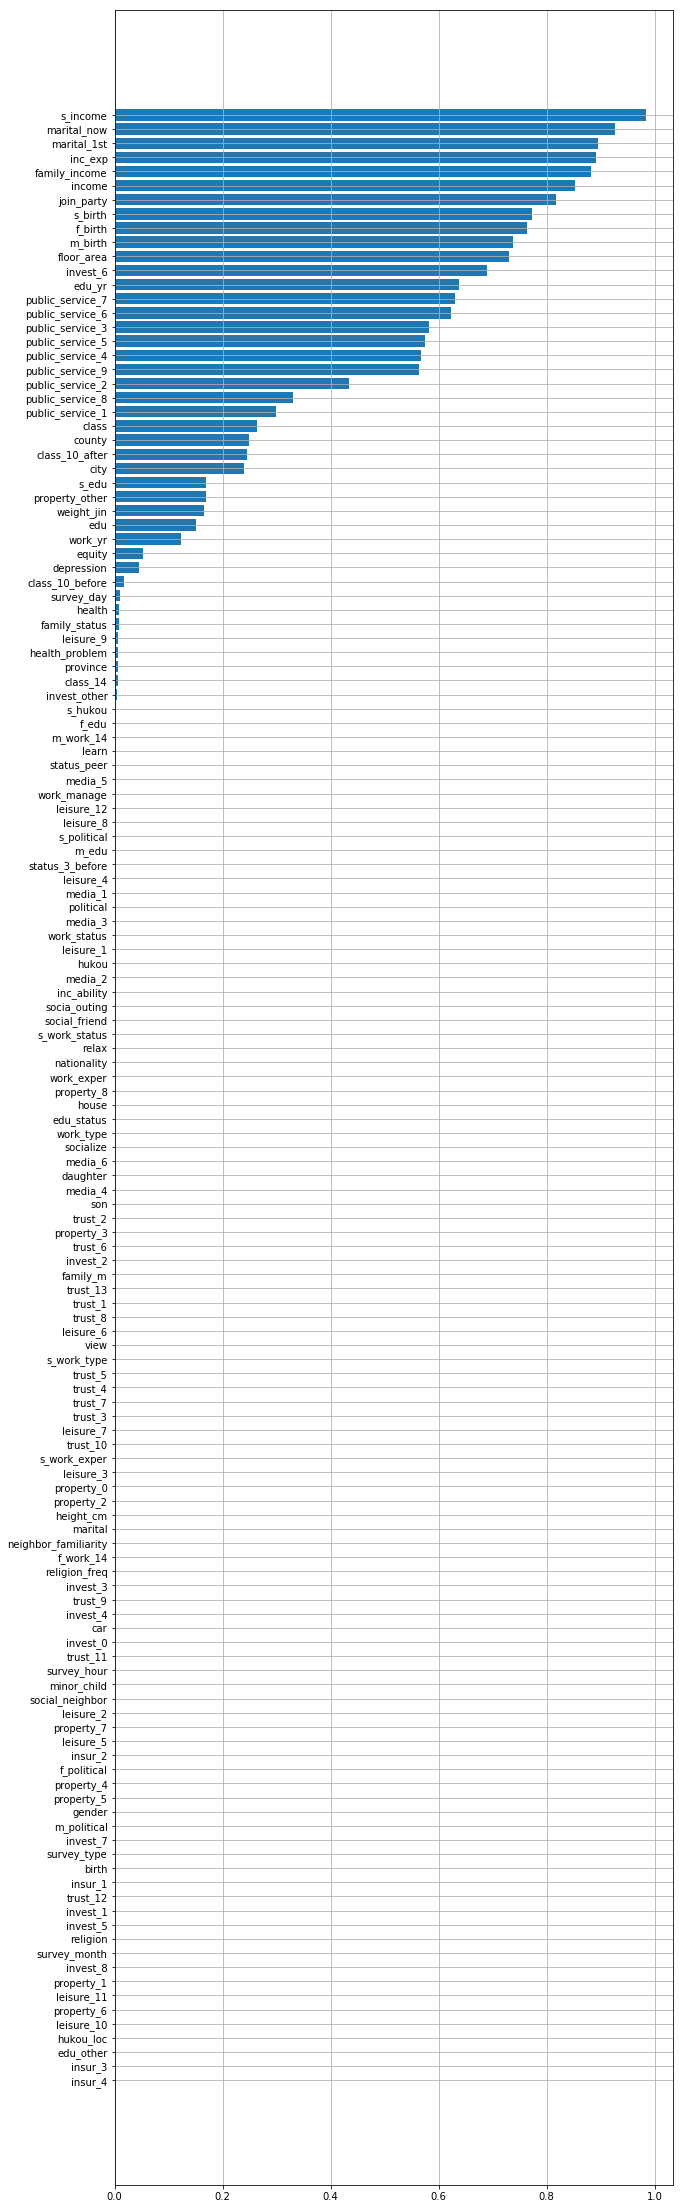

In [335]:
#卡方校验

X_train_new=X_train

#负值处理为众数
dict_temp={}
for i in X_train_new.columns:
    dict_temp[i]=X_train_new[i].value_counts().index[0]

for i in dict_temp.keys():
    X_train_new[i][X_train_new[i]<0]=dict_temp[i]

#处理完之后竟然还有负值，那就直接处理为其绝对值
X_train_new=np.abs(X_train_new)


#开始校验
p_value=feature_selection.chi2(X_train_new,y_train)[1]
p_value[np.isnan(p_value)]=0  #有0值



#看一下特征重要程度排序
import matplotlib.pyplot as plt
%matplotlib inline

temp=np.argsort(-p_value)  #返回index

p_value=list(p_value)
p_value=np.sort(p_value)

b=[]
for i in temp:
    b.append(X_train_new.columns[i])

plt.figure(figsize=(10,40))
plt.grid()
plt.barh(b,p_value,)

In [353]:
#开始特征处理
X_train_new=X_train
drop_columns=['edu_other','property_other','property_0','property_3','property_4','property_5','property_6','property_7'
             ,'invest_other','invest_0','invest_1','invest_2','invest_3','invest_4','invest_5','invest_6','invest_7','invest_8']

X_train_new=X_train.drop(columns=drop_columns)

#负值处理为众数
dict_temp={}
for i in X_train_new.columns:
    dict_temp[i]=X_train_new[i].value_counts().index[0]

for i in dict_temp.keys():
    X_train_new[i][X_train_new[i]<0]=dict_temp[i]

#处理完之后竟然还有负值，那就直接处理为其绝对值
X_train_new=np.abs(X_train_new)

clf9=xgboost.XGBRegressor(loss_function='RMSE')
clf=model_selection.GridSearchCV(clf9,{'max_depth':np.array([3])},cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_train_score']:=%s"%clf.cv_results_['mean_train_score'])
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

/Users/ranmo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[14:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_train_score']:=[-0.39571081]
clf.cv_results_['mean_test_score']:=[-0.46706154]


In [354]:
param_test = {
 'max_depth':range(1,10,2),
 'min_child_weight':range(1,6,2)
}

clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'max_depth': 3, 'min_child_weight': 3}

[14:47:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_test_score']:=[-0.49629617 -0.49629617 -0.49629617 -0.46706154 -0.46655171 -0.46695221
 -0.47025429 -0.46894737 -0.46938454 -0.47732883 -0.47470679 -0.47479634
 -0.49097455 -0.482061   -0.47970229]
-0.46655170944054675
{'max_depth': 3, 'min_child_weight': 3}


In [362]:
param_test= {
 'max_depth':[2,3,4],
 'min_child_weight':[2,3,4],
}

clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'max_depth': 4, 'min_child_weight': 3}

[14:53:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_test_score']:=[-0.47281265 -0.47264962 -0.47242255 -0.46700067 -0.46655171 -0.46637896
 -0.46540276 -0.46379584 -0.46526217]
-0.4637958445361493
{'max_depth': 4, 'min_child_weight': 3}


In [363]:
param_test= {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([3]),
 'gamma':np.arange(0,0.5,0.1)
}

clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'gamma': 0.0, 'max_depth': 4, 'min_child_weight': 3}

[14:54:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_test_score']:=[-0.46379584 -0.46472386 -0.46557719 -0.46595873 -0.46590472]
-0.4637958445361493
{'gamma': 0.0, 'max_depth': 4, 'min_child_weight': 3}


In [364]:
param_test= {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([3]),
 'gamma':np.array([0]),
 'subsample':np.arange(0.6,1,0.1),
 'colsample_bytree':np.arange(0.6,1,0.1) 
}

clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.8999999999999999}

[14:57:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_test_score']:=[-0.46709199 -0.46472051 -0.46440667 -0.46514686 -0.46787986 -0.46581916
 -0.4643355  -0.46213371 -0.46842063 -0.46412765 -0.46229298 -0.46602357
 -0.46741947 -0.46284412 -0.46495527 -0.46497405]
-0.46213371159173144
{'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.8999999999999999}


In [365]:
param_test= {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([3]),
 'gamma':np.array([0]),
 'subsample':np.arange(0.85,0.96,0.05),
 'colsample_bytree':np.arange(0.65,0.76,0.05) 
}

clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.7000000000000001, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.9}

[14:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_test_score']:=[-0.46650507 -0.46336426 -0.46357134 -0.46583315 -0.46213371 -0.46587957
 -0.46724244 -0.4653437  -0.46563525]
-0.46213371159173144
{'colsample_bytree': 0.7000000000000001, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.9}


In [366]:
param_test= {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([3]),
 'gamma':np.array([0]),
 'subsample':np.array([0.9]),
 'colsample_bytree':np.array([0.7]), 
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100] 
}

clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'subsample': 0.9}

[15:03:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_test_score']:=[-0.46270691 -0.46282199 -0.46143142 -0.4621337  -0.46424115 -0.46151407
 -0.46034898 -0.46174136 -0.46403007 -0.46462415 -0.46340958 -0.46350645
 -0.46346697 -0.46398413 -0.46457432 -0.46311576 -0.46339391 -0.46394577
 -0.46241054 -0.46561276 -0.48585047 -0.48586058 -0.48571659 -0.48566644
 -0.48827958]
-0.4603489788747363
{'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'subsample': 0.9}


In [367]:
param_test= {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([3]),
 'gamma':np.array([0]),
 'subsample':np.array([0.9]),
 'colsample_bytree':np.array([0.7]), 
 'reg_alpha':[0.005,0.008,0.01,0.02,0.05],
 'reg_lambda':[0.005,0.008,0.01,0.02,0.05], 
}

clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.008, 'reg_lambda': 0.008, 'subsample': 0.9}

[15:07:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_test_score']:=[-0.46215003 -0.46220416 -0.46100675 -0.46231339 -0.46434671 -0.46111192
 -0.45971456 -0.46067132 -0.46197861 -0.46302803 -0.45995849 -0.46048943
 -0.46034898 -0.46249979 -0.46216904 -0.46017792 -0.46239837 -0.46259249
 -0.46246635 -0.4625864  -0.46238431 -0.46271488 -0.46168857 -0.46225327
 -0.46233023]
-0.4597145647202028
{'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.008, 'reg_lambda': 0.008, 'subsample': 0.9}


In [368]:
param_test= {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([3]),
 'gamma':np.array([0]),
 'subsample':np.array([0.9]),
 'colsample_bytree':np.array([0.7]), 
 'reg_alpha':np.array([0.008]),
 'reg_lambda':np.array([0.008]),
 'learning_rate':[0.001,0.01,0.1,0.5],
}

clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.008, 'reg_lambda': 0.008, 'subsample': 0.9}

[15:11:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_test_score']:=[-9.93243834 -2.05514334 -0.45971456 -0.56454639]
-0.4597145647202028
{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.008, 'reg_lambda': 0.008, 'subsample': 0.9}


In [370]:
param_test= {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([3]),
 'gamma':np.array([0]),
 'subsample':np.array([0.9]),
 'colsample_bytree':np.array([0.7]), 
 'reg_alpha':np.array([0.008]),
 'reg_lambda':np.array([0.008]),
 'learning_rate':np.array([0.1]),
 'n_estimators=100':[50,100,500,1000]
}

clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators=100': 50, 'reg_alpha': 0.008, 'reg_lambda': 0.008, 'subsample': 0.9}

[15:14:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_test_score']:=[-0.45971456 -0.45971456 -0.45971456 -0.45971456]
-0.4597145647202028
{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators=100': 50, 'reg_alpha': 0.008, 'reg_lambda': 0.008, 'subsample': 0.9}


In [372]:
#调试最终结果
param_test= {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([3]),
 'gamma':np.array([0]),
 'subsample':np.array([0.9]),
 'colsample_bytree':np.array([0.7]), 
 'reg_alpha':np.array([0.008]),
 'reg_lambda':np.array([0.008]),
 'learning_rate':np.array([0.1]),
 'n_estimators=100':np.array([100])
}

clf=model_selection.GridSearchCV(clf9,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators=100': 50, 'reg_alpha': 0.008, 'reg_lambda': 0.008, 'subsample': 0.9}

[15:16:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf.cv_results_['mean_test_score']:=[-0.45971456]
-0.4597145647202028
{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators=100': 100, 'reg_alpha': 0.008, 'reg_lambda': 0.008, 'subsample': 0.9}


In [380]:
X_test_new=X_test.drop(columns=drop_columns)

#负值处理为众数
dict_temp={}
for i in X_test_new.columns:
    dict_temp[i]=X_test_new[i].value_counts().index[0]

for i in dict_temp.keys():
    X_test_new[i][X_test_new[i]<0]=dict_temp[i]

#处理完之后竟然还有负值，那就直接处理为其绝对值
X_test_new=np.abs(X_test_new)

/Users/ranmo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [384]:
# 结果22


from sklearn import metrics
import xgboost
from sklearn import model_selection
from sklearn.externals import joblib
#=============
#xgboost_modified
#=============

clf_xgboost_modified=xgboost.XGBRegressor(max_depth=4,min_child_weight=3,gamma=0,subsample=0.9,colsample_bytree=0.7,reg_alpha=0.008,reg_lambda=0.008)   
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]
i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X_train_new):
    X_train1 = X_train_new.iloc[train]
    y_train1 = y_train.iloc[train]
    X_test1 = X_train_new.iloc[test]
    y_test1 = y_train.iloc[test]
    
    clf_xgboost_modified.fit(X_train1,y_train1)
    y_pred=clf_xgboost_modified.predict(X_test1)
    e1=metrics.mean_squared_error(y_pred,y_test1)
    mes.append(e1)
    joblib.dump(clf_xgboost_modified,filename=r'/Users/ranmo/Desktop/天池/幸福感/feature/xgboost/xgboost_%d.pkl'%i)
    
    y_test=clf_xgboost_modified.predict(X_test_new)

    df22_final=pd.DataFrame({'id':X_test_new.index,'happiness':y_test}).set_index('id')
    df22_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/feature/xgboost/df2_xgboost_%d.csv'%i)
 
    i+=1
print('clf_xgboost_modified:')
print(mes)
print(np.mean(mes))
print()
print()

/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:28:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:28:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:28:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:29:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:29:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:29:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:29:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:29:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:29:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:29:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf_xgboost_modified:
[0.4310921651374143, 0.5206143029656454, 0.4722750649741061, 0.44625195791711836, 0.45445400392066815, 0.4786119727225872, 0.4579894538770142, 0.4673674575428974, 0.4995691973075638, 0.4672831144705728]
0.4695508690835587




In [386]:
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}
clf=model_selection.GridSearchCV(clf10,{'max_depth':np.array([-1])},cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

clf.cv_results_['mean_test_score']:=[-0.46937587]


In [388]:
param_test = {
 'max_depth':range(1,10,2),
 'min_child_weight':[0.001,0.01,1,10]   #样本权重之和阈值，防止过拟合。但这个xgboost是默认为1，lightgbm为什么默认0.001，可能是以为lightgbm本身就是简化模型，所以对权重要求比较高。
}

clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}
clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'max_depth': 3, 'min_child_weight': 0.001}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


clf.cv_results_['mean_test_score']:=[-0.49633983 -0.49633983 -0.49633983 -0.49633983 -0.46697051 -0.46697051
 -0.46697051 -0.46697051 -0.46834252 -0.46834252 -0.46834252 -0.46834252
 -0.46755334 -0.46755334 -0.46755334 -0.46755334 -0.47092165 -0.47092165
 -0.47092165 -0.47092165]
-0.4669705084868828
{'max_depth': 3, 'min_child_weight': 0.001}


In [390]:
param_test = {
 'max_depth':[2,3,4],
 'min_child_weight':[0.00001,0.00002,0.0005,0.001,0.002]   #样本权重之和阈值，防止过拟合。但这个xgboost是默认为1，lightgbm为什么默认0.001，可能是以为lightgbm本身就是简化模型，所以对权重要求比较高。
}

clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}
clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'max_depth': 4, 'min_child_weight': 1e-05}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/extern

clf.cv_results_['mean_test_score']:=[-0.47255037 -0.47255037 -0.47255037 -0.47255037 -0.47255037 -0.46697051
 -0.46697051 -0.46697051 -0.46697051 -0.46697051 -0.46520931 -0.46520931
 -0.46520931 -0.46520931 -0.46520931]
-0.4652093074426783
{'max_depth': 4, 'min_child_weight': 1e-05}


In [392]:
param_test = {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([1e-05]),  #样本权重之和阈值，防止过拟合。但这个xgboost是默认为1，lightgbm为什么默认0.001，可能是以为lightgbm本身就是简化模型，所以对权重要求比较高。
 'min_split_gain':np.arange(0,0.5,0.1),
}

clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}
clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0.0}


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


clf.cv_results_['mean_test_score']:=[-0.46520931 -0.46684016 -0.46722941 -0.46713891 -0.46591623]
-0.4652093074426783
{'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0.0}


In [393]:
param_test = {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([1e-05]),  #样本权重之和阈值，防止过拟合。但这个xgboost是默认为1，lightgbm为什么默认0.001，可能是以为lightgbm本身就是简化模型，所以对权重要求比较高。
 'min_split_gain':np.arange(0,0.1,0.01),
}

clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}
clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0.0}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/extern

clf.cv_results_['mean_test_score']:=[-0.46520931 -0.46563613 -0.46576417 -0.46540453 -0.46558315 -0.46601887
 -0.46590009 -0.46638339 -0.46613777 -0.46632978]
-0.4652093074426783
{'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0.0}


In [395]:
param_test = {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([1e-05]),  #样本权重之和阈值，防止过拟合。但这个xgboost是默认为1，lightgbm为什么默认0.001，可能是以为lightgbm本身就是简化模型，所以对权重要求比较高。
 'min_split_gain':np.array([0]),
 'subsample':np.arange(0.6,1.01,0.1),
 'colsample_bytree':np.arange(0.6,1.01,0.1), 
}

clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}
clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.6, 'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'subsample': 0.6}


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/extern

clf.cv_results_['mean_test_score']:=[-0.46414419 -0.46414419 -0.46414419 -0.46414419 -0.46414419 -0.46424902
 -0.46424902 -0.46424902 -0.46424902 -0.46424902 -0.46461762 -0.46461762
 -0.46461762 -0.46461762 -0.46461762 -0.46541317 -0.46541317 -0.46541317
 -0.46541317 -0.46541317 -0.46520931 -0.46520931 -0.46520931 -0.46520931
 -0.46520931]
-0.4641441949829722
{'colsample_bytree': 0.6, 'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'subsample': 0.6}


In [400]:
param_test = {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([1e-05]),  #样本权重之和阈值，防止过拟合。但这个xgboost是默认为1，lightgbm为什么默认0.001，可能是以为lightgbm本身就是简化模型，所以对权重要求比较高。
 'min_split_gain':np.array([0]),
 'subsample':np.arange(0.5,0.7,0.05),
 'colsample_bytree':np.arange(0.5,0.7,0.05),
}

clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}
clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.5, 'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'subsample': 0.5}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/extern

clf.cv_results_['mean_test_score']:=[-0.46326929 -0.46326929 -0.46326929 -0.46326929 -0.46457151 -0.46457151
 -0.46457151 -0.46457151 -0.46414419 -0.46414419 -0.46414419 -0.46414419
 -0.46405929 -0.46405929 -0.46405929 -0.46405929]
-0.46326928622993063
{'colsample_bytree': 0.5, 'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'subsample': 0.5}


In [401]:
param_test = {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([1e-05]),  #样本权重之和阈值，防止过拟合。但这个xgboost是默认为1，lightgbm为什么默认0.001，可能是以为lightgbm本身就是简化模型，所以对权重要求比较高。
 'min_split_gain':np.array([0]),
 'subsample':np.array([0.5]),
 'colsample_bytree':np.array([0.5]),
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100],  
}

clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}
clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.5, 'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'reg_alpha': 1, 'reg_lambda': 1e-05, 'subsample': 0.5}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/extern

clf.cv_results_['mean_test_score']:=[-0.46326928 -0.46301636 -0.46345036 -0.46376374 -0.46410265 -0.46237325
 -0.46216125 -0.46370647 -0.46330029 -0.46345513 -0.46284091 -0.46369749
 -0.46441502 -0.46352616 -0.46389412 -0.46174245 -0.46180736 -0.46265108
 -0.46214632 -0.46408568 -0.48916268 -0.4891586  -0.48911449 -0.48924352
 -0.49100577]
-0.46174244978496803
{'colsample_bytree': 0.5, 'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'reg_alpha': 1, 'reg_lambda': 1e-05, 'subsample': 0.5}


In [402]:
param_test = {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([1e-05]),  #样本权重之和阈值，防止过拟合。但这个xgboost是默认为1，lightgbm为什么默认0.001，可能是以为lightgbm本身就是简化模型，所以对权重要求比较高。
 'min_split_gain':np.array([0]),
 'subsample':np.array([0.5]),
 'colsample_bytree':np.array([0.5]),
 'reg_alpha':[0.6,0.8,1,1.2,1.4],
 'reg_lambda':[1e-6, 1e-5,1e-4,1e-3],
}

clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}
clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.5, 'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'reg_alpha': 1, 'reg_lambda': 1e-05, 'subsample': 0.5}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/extern

clf.cv_results_['mean_test_score']:=[-0.46338242 -0.46338242 -0.4633824  -0.46407955 -0.46195393 -0.46195393
 -0.46163111 -0.46163097 -0.46174245 -0.46174245 -0.46174244 -0.46174234
 -0.46210504 -0.46210504 -0.46210503 -0.46210492 -0.46239162 -0.46239161
 -0.46239161 -0.46232598]
-0.46163096971764633
{'colsample_bytree': 0.5, 'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'reg_alpha': 0.8, 'reg_lambda': 0.001, 'subsample': 0.5}


In [403]:
param_test = {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([1e-05]),  #样本权重之和阈值，防止过拟合。但这个xgboost是默认为1，lightgbm为什么默认0.001，可能是以为lightgbm本身就是简化模型，所以对权重要求比较高。
 'min_split_gain':np.array([0]),
 'subsample':np.array([0.5]),
 'colsample_bytree':np.array([0.5]),
 'reg_alpha':np.array([0.8]),
 'reg_lambda':np.array([0.001]) ,
 'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.5],
}

clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}
clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.5, 'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'reg_alpha': 1, 'reg_lambda': 1e-05, 'subsample': 0.5}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


clf.cv_results_['mean_test_score']:=[-0.64823458 -0.58444051 -0.53953859 -0.4676636  -0.46163097 -0.52912393]
-0.46163096971764633
{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'reg_alpha': 0.8, 'reg_lambda': 0.001, 'subsample': 0.5}


In [404]:
#调试最终结果

param_test = {
 'max_depth':np.array([4]),
 'min_child_weight':np.array([1e-05]),  #样本权重之和阈值，防止过拟合。但这个xgboost是默认为1，lightgbm为什么默认0.001，可能是以为lightgbm本身就是简化模型，所以对权重要求比较高。
 'min_split_gain':np.array([0]),
 'subsample':np.array([0.5]),
 'colsample_bytree':np.array([0.5]),
 'reg_alpha':np.array([0.8]),
 'reg_lambda':np.array([0.001]) ,
 'learning_rate':np.array([0.1]),
}

clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}
clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

#结论：{'colsample_bytree': 0.5, 'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'reg_alpha': 1, 'reg_lambda': 1e-05, 'subsample': 0.5}


clf.cv_results_['mean_test_score']:=[-0.46163097]
-0.46163096971764633
{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1e-05, 'min_split_gain': 0, 'reg_alpha': 0.8, 'reg_lambda': 0.001, 'subsample': 0.5}


In [405]:
# 结果33


#=============
#lightgbm_modified
#=============

clf_lightgbm_modified=lightgbm.LGBMRegressor(metric='l2',colsample_bytree=0.5,learning_rate=0.1,
                                             max_depth=4,min_child_weight=1e-05,min_split_gain=0,
                                             reg_alpha=0.8,reg_lambda=0.001,subsample=0.5)  #交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]
i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X_train_new):
    X_train1 = X_train_new.iloc[train]
    y_train1 = y_train.iloc[train]
    X_test1 = X_train_new.iloc[test]
    y_test1 = y_train.iloc[test]
    
    clf_lightgbm_modified.fit(X_train1,y_train1)
    y_pred=clf_lightgbm_modified.predict(X_test1)
    e1=metrics.mean_squared_error(y_pred,y_test1)
    mes.append(e1)
    joblib.dump(clf_lightgbm_modified,filename=r'/Users/ranmo/Desktop/天池/幸福感/feature/lightgbm/lightgbm_%d.pkl'%i)
    
    y_test=clf_lightgbm_modified.predict(X_test_new)

    df33_final=pd.DataFrame({'id':X_test_new.index,'happiness':y_test}).set_index('id')
    df33_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/feature/lightgbm/df2_lightgbm_%d.csv'%i)
 
    i+=1
print('clf_lightgbm_modified:')
print(mes)
print(np.mean(mes))
print()
print()

clf_lightgbm_modified:
[0.45436035738785735, 0.481563289891704, 0.47758811397592, 0.4544073874204746, 0.4369013141952935, 0.4444475691850093, 0.4745621471680302, 0.4909340947801399, 0.4493002413197312, 0.48209997182093745]
0.46461644871450974




In [406]:
clf8=ensemble.GradientBoostingRegressor(loss='ls')   
clf=model_selection.GridSearchCV(clf8,{'max_depth':np.array([3])},cv=10,n_jobs=-1,scoring='neg_mean_squared_error') #用均方差计算score
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])

clf.cv_results_['mean_test_score']:=[-0.46538703]


In [407]:
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':range(1,10,2),
 'min_weight_fraction_leaf':[0.0001,0.001,0.01,0.1,0.5],    #不清楚GDBT里面权重的尺度一般是多少
 'max_features':np.array([20]),      #为了提升速度
 'learning_rate':np.array([0.3]),    #为了提升速度
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 3, 'max_features': 20, 'min_weight_fraction_leaf': 0.01}

clf.cv_results_['mean_test_score']:=[-0.47614681 -0.47556518 -0.47547978 -0.48820805 -0.67006504 -0.48191973
 -0.47495695 -0.46952331 -0.4784112  -0.67006562 -0.51305052 -0.50635114
 -0.4861473  -0.47897448 -0.67006507 -0.54043498 -0.5230623  -0.50295239
 -0.47417215 -0.67006528 -0.54526683 -0.53800849 -0.51328773 -0.47646555
 -0.67006504]
-0.4695233050029428
{'learning_rate': 0.3, 'max_depth': 3, 'max_features': 20, 'min_weight_fraction_leaf': 0.01}


In [408]:
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':range(1,6,1),
 'min_weight_fraction_leaf':[0.006,0.008,0.01,0.02,0.05],    #不清楚GDBT里面权重的尺度一般是多少
 'max_features':np.array([20]),      #为了提升速度
 'learning_rate':np.array([0.3]),    #为了提升速度
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 20, 'min_weight_fraction_leaf': 0.006}

clf.cv_results_['mean_test_score']:=[-0.4771471  -0.47530048 -0.47592562 -0.47620856 -0.47958517 -0.46770871
 -0.47087086 -0.47089481 -0.46938208 -0.47012813 -0.47837359 -0.47191709
 -0.47192102 -0.47197728 -0.47066229 -0.48641126 -0.48201674 -0.47590858
 -0.47162066 -0.47312449 -0.49089182 -0.48626231 -0.49151566 -0.48181283
 -0.47732002]
-0.467708711540672
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 20, 'min_weight_fraction_leaf': 0.006}


In [415]:
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.006]), 
 'min_impurity_split':np.array([1e-7,1e-6,1e-5,1e-4,1e-3]),   
 'max_features':np.array([20]),      #为了提升速度
 'learning_rate':np.array([0.3]),    #为了提升速度
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 20, 'min_impurity_split': 0.001, 'min_weight_fraction_leaf': 0.006}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

clf.cv_results_['mean_test_score']:=[-0.46856033 -0.47141756 -0.46859069 -0.46838223 -0.46644465]
-0.46644465499692045
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 20, 'min_impurity_split': 0.001, 'min_weight_fraction_leaf': 0.006}


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [416]:
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.006]), 
 'min_impurity_split':[0.0006,0.0008,0.001,0.002,0.005],  
 'max_features':np.array([20]),      #为了提升速度
 'learning_rate':np.array([0.3]),    #为了提升速度
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 20, 'min_impurity_split': 0.001, 'min_weight_fraction_leaf': 0.006}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

clf.cv_results_['mean_test_score']:=[-0.47179332 -0.46800896 -0.47162587 -0.47002209 -0.46922311]
-0.4680089626452048
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 20, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006}


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [417]:
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.006]), 
 'min_impurity_split':np.array([0.0008]),  
 'subsample':np.arange(0.5,1.01,0.1),
 'max_features':[0.4,0.6,0.8,1],     
    
 'learning_rate':np.array([0.3]),    #为了提升速度
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.4, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'subsample': 0.8999999999999999}


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

clf.cv_results_['mean_test_score']:=[-0.47986489 -0.47364787 -0.47344181 -0.47202265 -0.46566274 -0.4712755
 -0.47983254 -0.47223211 -0.47785769 -0.4704478  -0.46837991 -0.47007904
 -0.48243261 -0.47428786 -0.4724932  -0.47176893 -0.47089559 -0.46646761
 -0.51554137 -0.51468897 -0.51925857 -0.5168806  -0.51370741 -0.51585979]
-0.4656627427598675
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.4, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'subsample': 0.8999999999999999}


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [418]:

clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.006]), 
 'min_impurity_split':np.array([0.0008]),  
 'subsample':[0.86,0.88,0.90,0.92,0.94],
 'max_features':[0.36,0.38,0.4,0.42,0.44],   
    
 'learning_rate':np.array([0.3]),    #为了提升速度
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.44, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'subsample': 0.92}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

clf.cv_results_['mean_test_score']:=[-0.46977823 -0.46994182 -0.4685862  -0.47033586 -0.4686325  -0.47132165
 -0.46595063 -0.46801278 -0.46823057 -0.46792201 -0.47082041 -0.47262353
 -0.46869513 -0.46998714 -0.47051287 -0.47267186 -0.46983398 -0.46756781
 -0.4705348  -0.46934436 -0.468385   -0.46649553 -0.4717074  -0.46547068
 -0.47004592]
-0.4654706774343553
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.44, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'subsample': 0.92}


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [420]:

clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.006]), 
 'min_impurity_split':np.array([0.0008]),  
 'subsample':np.array([0.92]),
 'max_features':np.array([0.44]),
 'n_estimators':[50,100,200,400],   
    
 'learning_rate':np.array([0.3]),    #为了提升速度
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.44, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'n_estimators': 100, 'subsample': 0.92}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

clf.cv_results_['mean_test_score']:=[-0.47121738 -0.46698195 -0.47282256 -0.48106131]
-0.4669819533621578
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.44, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'n_estimators': 100, 'subsample': 0.92}


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [421]:

clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.006]), 
 'min_impurity_split':np.array([0.0008]),  
 'subsample':np.array([0.92]),
 'max_features':np.array([0.44]),
 'n_estimators':[50,60,70,80,90,100,110,120],   #可能过拟合了  
    
 'learning_rate':np.array([0.3]),    #为了提升速度
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.44, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'n_estimators': 100, 'subsample': 0.92}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

clf.cv_results_['mean_test_score']:=[-0.47311835 -0.47265157 -0.46749852 -0.46896541 -0.47168685 -0.46727414
 -0.46957027 -0.46892771]
-0.4672741367231356
{'learning_rate': 0.3, 'max_depth': 2, 'max_features': 0.44, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'n_estimators': 100, 'subsample': 0.92}


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [422]:

clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.006]), 
 'min_impurity_split':np.array([0.0008]),  
 'subsample':np.array([0.92]),
 'max_features':np.array([0.44]),
 'n_estimators':np.array([80]),   #可能过拟合了
 'learning_rate':[0.001,0.01,0.05,0.1,0.2,0.3],    #可能过拟合
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.2, 'max_depth': 2, 'max_features': 0.44, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'n_estimators': 80, 'subsample': 0.92}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

clf.cv_results_['mean_test_score']:=[-0.65775451 -0.58073354 -0.49557486 -0.4758873  -0.46798523 -0.46856776]
-0.4679852327878767
{'learning_rate': 0.2, 'max_depth': 2, 'max_features': 0.44, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'n_estimators': 80, 'subsample': 0.92}


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [425]:

clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.006]), 
 'min_impurity_split':np.array([0.0008]),  
 'subsample':np.array([0.92]),
 'max_features':np.array([0.44]),
 'n_estimators':np.array([80]),   
 'learning_rate':[0.16,0.18,0.2,0.22,0.24],    #可能过拟合
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.22, 'max_depth': 2, 'max_features': 0.44, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'n_estimators': 80, 'subsample': 0.92}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

clf.cv_results_['mean_test_score']:=[-0.46851717 -0.46733549 -0.46704901 -0.46521533 -0.46856025]
-0.46521533029457596
{'learning_rate': 0.22, 'max_depth': 2, 'max_features': 0.44, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'n_estimators': 80, 'subsample': 0.92}


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [426]:
#调试最终结果

clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.006]), 
 'min_impurity_split':np.array([0.0008]),  
 'subsample':np.array([0.92]),
 'max_features':np.array([0.44]),
 'n_estimators':np.array([80]),   
 'learning_rate':np.array([0.22]),    #可能过拟合
}

clf=model_selection.GridSearchCV(clf8,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train_new,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'learning_rate': 0.22, 'max_depth': 2, 'max_features': 0.44, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'n_estimators': 80, 'subsample': 0.92}

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

clf.cv_results_['mean_test_score']:=[-0.46695477]
-0.46695476562824945
{'learning_rate': 0.22, 'max_depth': 2, 'max_features': 0.44, 'min_impurity_split': 0.0008, 'min_weight_fraction_leaf': 0.006, 'n_estimators': 80, 'subsample': 0.92}


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [428]:
# 结果33


#=============
#lightgbm_modified
#=============

clf_gdbt_modified=ensemble.GradientBoostingRegressor(loss='ls',max_depth=2,min_weight_fraction_leaf=0.006,min_impurity_split=0.0008
                                                    ,subsample=0.92,max_features=0.44,n_estimators=80,learning_rate=0.22) 
mes=[]
i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X_train_new):
    X_train1 = X_train_new.iloc[train]
    y_train1 = y_train.iloc[train]
    X_test1 = X_train_new.iloc[test]
    y_test1 = y_train.iloc[test]
    
    clf_gdbt_modified.fit(X_train1,y_train1)
    y_pred=clf_gdbt_modified.predict(X_test1)
    e1=metrics.mean_squared_error(y_pred,y_test1)
    mes.append(e1)
    joblib.dump(clf_gdbt_modified,filename=r'/Users/ranmo/Desktop/天池/幸福感/feature/gdbt/gdbt_%d.pkl'%i)
    
    y_test=clf_gdbt_modified.predict(X_test_new)

    df44_final=pd.DataFrame({'id':X_test_new.index,'happiness':y_test}).set_index('id')
    df44_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/feature/gdbt/df44_gdbt_%d.csv'%i)
 
    i+=1
print('clf_gdbt_modified:')
print(mes)
print(np.mean(mes))
print()
print()

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

clf_gdbt_modified:
[0.48538919898291194, 0.48874671496877864, 0.4615484425179129, 0.45001540624268266, 0.515611135404841, 0.41702157715030563, 0.4798070572856091, 0.45752148245173047, 0.47474229377450594, 0.4505464695633184]
0.4680949778342597




/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [432]:
##最后一次平均融合

#平均融合xgboost + lightgbm + gdbt现有模型


#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.externals import joblib
from sklearn import metrics
import lightgbm
#lighgbm防报错
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import xgboost
from sklearn import ensemble

xgboost_mes=[]
lightgbm_mes=[]
gdbt_mes=[]
mix_mes=[]

i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X_train_new):
    X_train1 = X_train_new.iloc[train]
    y_train1 = y_train.iloc[train]
    X_test1 = X_train_new.iloc[test]
    y_test1 = y_train.iloc[test]
    
    print(i)
    
    xgboost=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/xgboost/xgboost_%d.pkl'%i)  #因为原始的xgboost准确率高一些
    lightgbm=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/feature/lightgbm/lightgbm_%d.pkl'%i)
    gdbt=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/feature/gdbt/gdbt_%d.pkl'%i)
    
    xgboost_y_pred=xgboost.fit(X_train1,y_train1).predict(X_test1)
    lightgbm_y_pred=lightgbm.fit(X_train1,y_train1).predict(X_test1)
    gdbt_y_pred=gdbt.fit(X_train1,y_train1).predict(X_test1)
    mix_y_pred=(xgboost_y_pred+lightgbm_y_pred+gdbt_y_pred)/3
    
    
    
    xgboost_mes.append(metrics.mean_squared_error(xgboost_y_pred,y_test1))
    lightgbm_mes.append(metrics.mean_squared_error(lightgbm_y_pred,y_test1))
    gdbt_mes.append(metrics.mean_squared_error(gdbt_y_pred,y_test1))
    mix_mes.append(metrics.mean_squared_error(mix_y_pred,y_test1))
    
    xgboost_y_test=xgboost.predict(X_test_new)
    lightgbm_y_test=lightgbm.predict(X_test_new)
    gdbt_y_test=gdbt.predict(X_test_new)
    mix_y_test=(xgboost_y_test+lightgbm_y_test+gdbt_y_test)/3

    df_mix_final=pd.DataFrame({'id':X_test.index,'happiness':mix_y_test}).set_index('id')
    df_mix_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/feature/mixmodel/df_mix_%d.csv'%i)
    
    i+=1
print('xgboost:')
print(xgboost_mes)
print(np.mean(xgboost_mes))
print()
print('lightgbm:')
print(lightgbm_mes)
print(np.mean(lightgbm_mes))
print()
print('gdbt:')
print(gdbt_mes)
print(np.mean(gdbt_mes))
print()
print('mix:')
print(mix_mes)
print(np.mean(mix_mes))
print()


0
[16:33:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

1
[16:33:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

2
[16:33:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

3
[16:33:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

4
[16:33:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

5
[16:33:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

6
[16:33:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

7
[16:33:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

8
[16:34:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

9
[16:34:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

xgboost:
[0.47470206088749334, 0.4683015665490044, 0.42895193625387423, 0.5140043705014141, 0.41524524100658056, 0.4674757237338078, 0.49528720628426454, 0.46234146063492737, 0.4264718315142779, 0.5027411509929034]
0.4655522548358547

lightgbm:
[0.47161644753065685, 0.4682287898196326, 0.4331924670423217, 0.5092253764959506, 0.408354278009191, 0.47072158467062647, 0.49583226629822413, 0.4659874868512387, 0.42526574744977225, 0.5067172831638006]
0.4655141727331415

gdbt:
[0.46946333653489714, 0.4642599340492597, 0.439631333821818, 0.5163148399475511, 0.41686006568262585, 0.47676079078164046, 0.49985417887080286, 0.4719390458318735, 0.42337474248917095, 0.5206655334917384]
0.4699123801501378

mix:
[0.4668060198061449, 0.46249078206273836, 0.4290405923011622, 0.5087869350014292, 0.40848657277380845, 0.4669285427483593, 0.49146916877229546, 0.4621599528893282, 0.4206041536064743, 0.5052616499267829]
0.46220343698885225



/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

In [433]:
##尝试随机种子来微调准确率
#平均融合xgboost + lightgbm + gdbt现有模型


#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.externals import joblib
from sklearn import metrics
import lightgbm
#lighgbm防报错
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import xgboost
from sklearn import ensemble



for random_i in range(15):
    

    xgboost_mes=[]
    lightgbm_mes=[]
    gdbt_mes=[]
    mix_mes=[]

    i=0

    kf=model_selection.KFold(10,shuffle=False,random_state=random_i)
    for train,test in kf.split(X_train_new):
        X_train1 = X_train_new.iloc[train]
        y_train1 = y_train.iloc[train]
        X_test1 = X_train_new.iloc[test]
        y_test1 = y_train.iloc[test]

        
        xgboost=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/xgboost/xgboost_%d.pkl'%i)
        lightgbm=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/feature/lightgbm/lightgbm_%d.pkl'%i)
        gdbt=joblib.load(r'/Users/ranmo/Desktop/天池/幸福感/feature/gdbt/gdbt_%d.pkl'%i)

        xgboost_y_pred=xgboost.fit(X_train1,y_train1).predict(X_test1)
        lightgbm_y_pred=lightgbm.fit(X_train1,y_train1).predict(X_test1)
        gdbt_y_pred=gdbt.fit(X_train1,y_train1).predict(X_test1)
        mix_y_pred=(xgboost_y_pred+lightgbm_y_pred+gdbt_y_pred)/3



        xgboost_mes.append(metrics.mean_squared_error(xgboost_y_pred,y_test1))
        lightgbm_mes.append(metrics.mean_squared_error(lightgbm_y_pred,y_test1))
        gdbt_mes.append(metrics.mean_squared_error(gdbt_y_pred,y_test1))
        mix_mes.append(metrics.mean_squared_error(mix_y_pred,y_test1))

        xgboost_y_test=xgboost.predict(X_test_new)
        lightgbm_y_test=lightgbm.predict(X_test_new)
        gdbt_y_test=gdbt.predict(X_test_new)
        mix_y_test=(xgboost_y_test+lightgbm_y_test+gdbt_y_test)/3

        df_mix_final=pd.DataFrame({'id':X_test.index,'happiness':mix_y_test}).set_index('id')
        df_mix_final.to_csv(r'/Users/ranmo/Desktop/天池/幸福感/feature/mixmodel%d/df_mix_%d.csv'%(random_i,i))

        i+=1
    print(random_i)

[16:40:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change f

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:40:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:40:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:40:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:40:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:40:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:40:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:40:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

0
[16:41:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

1
[16:41:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:41:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

2
[16:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

3
[16:42:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:42:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

4
[16:43:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:43:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

5
[16:44:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

6
[16:44:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:44:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

7
[16:45:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:45:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

8
[16:45:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

9
[16:46:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:46:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

10
[16:47:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

11
[16:47:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:47:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

12
[16:48:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:48:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

13
[16:49:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:49:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:49:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:49:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:49:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:49:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:49:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:49:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:49:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

[16:49:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p

14


/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.p